# 1 - Perkenalan

- Nama : Evan Derin Ihsanudin

- Batch : FTDS-017-RMT

- Dataset : `Employee` (https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction?datasetId=1642869&sortBy=voteCount)

Dataset ini berisi informasi mengenai karyawan pada suatu *company*. Informasi ini mencakup edukasi karyawan, tahun bergabung ke perusahaan, kota tempat bekerja, *tier payment*, umur, *gender*, *track record project*, pengalaman karyawan dalam bidang kerjanya dan status/label *resign*

- Latar Belakang Objective : 

Karyawan merupakan aset yang berharga bagi organisasi atau perusahaan. Sebagai aset, karyawan harus bisa dikelola dengan baik agar tetap bisa memberikan kontribusi kepada organisasi atau perusahaan. Menurut Handoko (2001:4) keberhasilan pengelolaan organisasi sangat ditentukan kegiatan pendayagunaan sumber daya manusia. Akan tetapi, karyawan tidak dapat dan tidak boleh disamakan dengan alat atau mesin pabrik, masing-masing dari mereka memiliki pikiran, perasaan, status, keinginan, dan latar belakang yang berbeda antara yang satu dengan yang lain. Jika karyawan sudah merasa nilai-nilai-nya atau keinginan-nya tidak sejalan dengan perusahaan, maka karyawan tersebut berpotensi mengundurkan diri (*resign*). Dengan *resign* nya karyawan, maka sebagai HRD, harus segera mencari pengganti dari karyawan tersebut agar fungsi dalam perusahaan tidak kosong. Karena jika terdapat kekosongan fungsi dalam waktu yang panjang, akan dapat mempengaruhi operasional perusahaan. Oleh karena itu **dibutuhkan model prediktif untuk memprediksi apakah karyawan dalam perusahaan memiliki potensi *resign* atau tidak** (https://www.siker.id/detail/news/279/artikel/berikut-alasan-karyawan-adalah-aset-penting-perusahaan, https://www.linovhr.com/karyawan-resign-kerja-mendadak/)

- Objective : 

Membuat, menguji dan memilih model yang memiliki performa optimal untuk mem-prediksi kemungkinan *resign* karyawan dalam 2 tahun kedepan, dengan tujuan akhir untuk meningkatkan responsivitas HRD terhadap kekosongan fungsi strategis akibat *resign*-nya karyawan


# 2 - Import Libraries

Library adalah *package* python yang digunakan untuk membantu mempersingkat beberapa proses. Library ini nantinya akan saya gunakan untuk kebutuhan *import data, cleaning data*, analisis data, visualisasi data, pembuatan model dan pengujian model.

In [1]:
#Library Pengolahan Data
import numpy as np
import pandas as pd

#Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Library Split Test dan Train
from sklearn.model_selection import train_test_split

#Library Pipeline
from sklearn.pipeline import Pipeline

#Library Scaling dan Encoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#Library Model
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Library Parameter Tuning
from sklearn.model_selection import GridSearchCV

#Library Evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score #untuk membuat dataframe evaluasi, agar lebih mudah membandingkan
from sklearn.metrics import recall_score, f1_score, precision_score #untuk membuat dataframe evaluasi, agar lebih mudah membandingkan

#Library SMOTE Imbalanced
from imblearn.over_sampling import SMOTENC

#Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

#Library Saving Model
import pickle 

# 3 - Data Loading

Setelah import library selanjutnya adalah *Data Loading*. *Data Loading* adalah proses memasukkan data ke dalam python.
Dataset yang saya gunakan adalah data `Employee` (https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction?datasetId=1642869&sortBy=voteCount)

Import data menggunakan bantuan pandas

In [2]:
#Import data syntax pd.read_csv kemudian assign ke variabel 'df' agar memudahkan pemanggilan
df = pd.read_csv('Employee.csv')

Selanjutnya saya akan menampilkan 10 data teratas dan 10 data terakhir

In [3]:
#Menampilkan 10 data teratas
pd.set_option('display.max_columns', 500) 
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [4]:
#Menampilkan 10 data terakhir
df.tail(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4645,Masters,2017,Pune,2,31,Female,No,2,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


Kemudian pengecekan null values pada data

In [5]:
#Pengecekan null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Karena tidak ada data *null* maka ***handling outliers*** akan dilakukan terlebih dahulu pada poin *feature engineering*. Selanjutnya mengecek informasi dataset

In [6]:
#Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Kemudian saya akan menyertakan deskripsi informasi dari **website kaggle** :

- Education -> Edukasi karyawan - {Bachelors, Masters, Phd}.

- JoiningYear -> Tahun bergabungnya karyawan - {2012, 2013, 2014, 2015, 2016, 2017, 2018}.

- City -> Lokasi bekerja karyawan - {Bangalore, Pune, New Delhi}.

- PaymentTier -> *Tier* gaji karyawan - {1 : Highest, 2 : Mid Level, 3 : Low Level}.

- Age -> Umur karyawan - {22-41}.

- Gender -> *Gender* karyawan - {Male,Female}.

- EverBenched -> Pernah terlibat dalam *project* 1 bulan ke atas atau tidak - {'Yes','No'}.

- ExperienceInCurrentDomain -> Pengalaman dalam *domain* kerja dalam satuan tahun - {0-7}

- LeaveOrNot -> Label *resign* karyawan (dalam kurun 2 tahun) - {0 : Tidak, 1 : Ya}

Dari informasi diatas dapat disimpulkan bahwa :

- Dataset memiliki **4.653 data** dan **9 *feature***
- Dataset memiliki 3 *feature numeric* dan 4 *feature categorical nominal* dan 2 *feature categorical ordinal* (berdasarkan informasi di kaggle)
- Tidak terdapat *null values* pada seluruh *feature*
- Terdapat beberapa *feature* yang sudah di-encoding dari sumber (*feature LeaveOrNot* dan *feature PaymentTier* )


# 4 - Exploratory Data Analysis (EDA)

Setelah memindahkan data ke python, selanjutnya adalah explorasi data lebih lanjut.

Sebelum *exploratory* lebih lanjut, dataset perlu di-copy ke *variable* baru. **Karena poin EDA tidak boleh mengubah *dataset***

In [7]:
#Copy dataset ke variabel df_eda
df_eda = df.copy()

Kemudian saya akan memisahkan kolom sesuai tipe data untuk memudahkan analisis

In [8]:
# Memisahkan kolom numerical dan categorical

df_num_columns = ['Age', 'ExperienceInCurrentDomain','JoiningYear']
df_cat_nominal_columns = ['City', 'Gender', 'EverBenched']
df_cat_ordinal_columns = ['Education','PaymentTier']
df_target = ['LeaveOrNot']

#Print kolom num, cat nominal, cat ordinal, target
print('Num Columns : ', df_num_columns)
print('Cat Nominal Columns : ', df_cat_nominal_columns)
print('Cat Ordinal Columns : ', df_cat_ordinal_columns)
print('Target Columns : ', df_target)

Num Columns :  ['Age', 'ExperienceInCurrentDomain', 'JoiningYear']
Cat Nominal Columns :  ['City', 'Gender', 'EverBenched']
Cat Ordinal Columns :  ['Education', 'PaymentTier']
Target Columns :  ['LeaveOrNot']


## 4.1 Statistik Deskriptif Dasar

Saya ingin mengetahui statistik deskriptif dasar *feature numerical* pada *dataset* 

In [9]:
#Mengecek statistik dasar dengan syntax .describe
df_eda[df_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0


Dari informasi diatas dapat disimpulkan bahwa :

1. Karyawan memiliki rata-rata umur 29 tahun dengan *range* 22-41 tahun. Umur karyawan terdistribusi merata (karena mean dan median tidak selisih jauh)
2. Pengalaman karyawan pada *domain*-nya, memiliki rata-rata 2.9 tahun dan *range* 0-7 tahun. Pengalaman karyawan terdistribusi merata (karena mean dan median tidak selisih jauh)
3. Karyawan bergabung ke perusahaan pada *range* 2012 - 2018. Tahun bergabungnya karyawan terdistribusi merata (karena mean dan median tidak selisih jauh) 

Note : Untuk poin distribusi adalah **asumsi dengan statistik deskriptif dasar**, nanti akan saya buktikan pada poin *feature engineering* dengan plotting dan print skew

Selanjutnya saya akan coba cek plot distribusi *feature numerical*

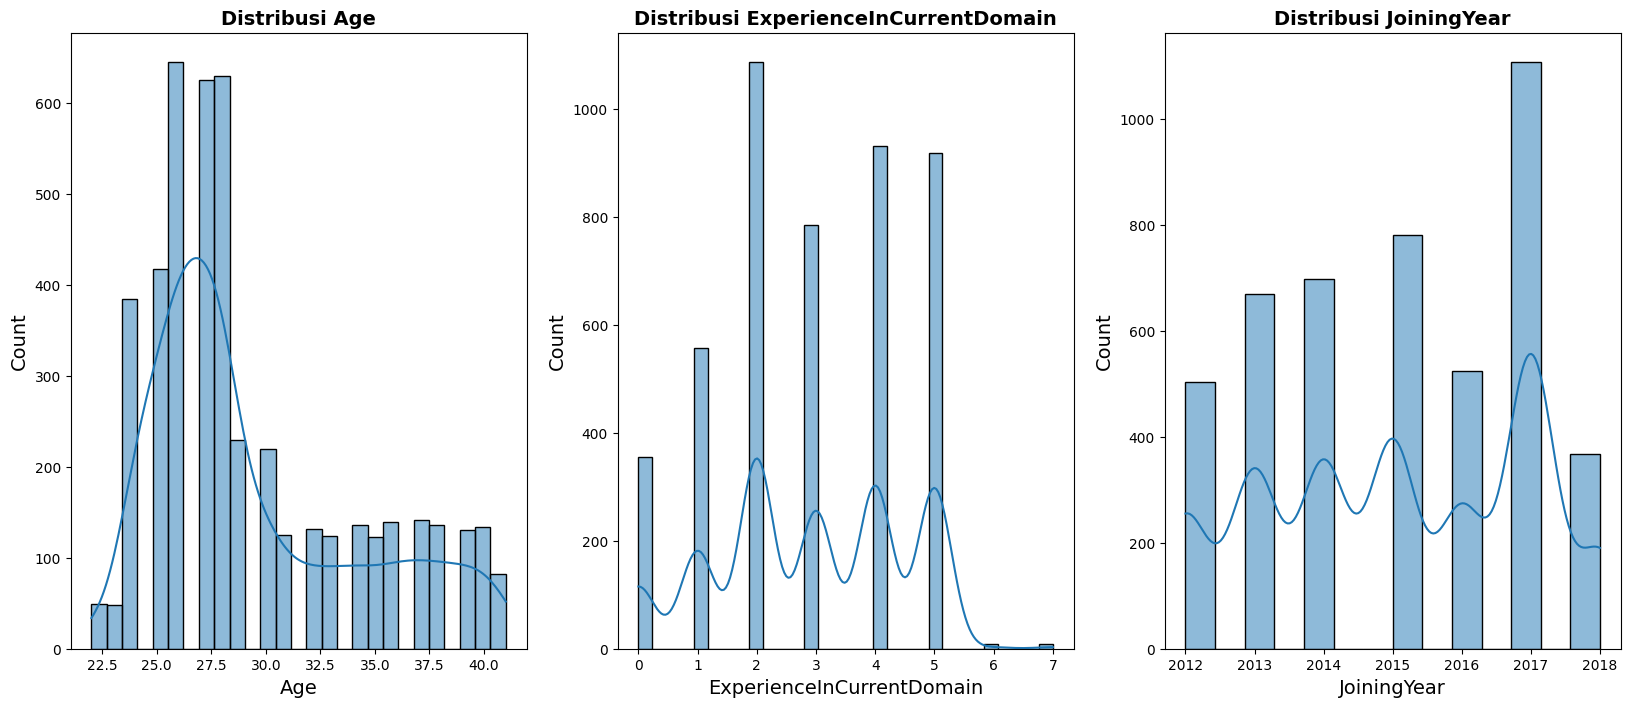

In [10]:
#Plot Distribusi
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in df_num_columns:
    if plotnumber <= 4:
        ax = plt.subplot(1, 3, plotnumber)
        sns.histplot(df_eda[col], kde=True)
        a = 'Distribusi ' + col
        plt.title(a, fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
    plotnumber += 1
    
plt.show()

Dari Informasi diatas dapat disimpulkan bahwa :

- Umur karyawan paling banyak pada umur 26 tahun dan terpusat pada 26-28 tahun
- Karyawan paling banyak memiliki pengalaman 2 tahun. Sedangkan untuk karyawan yang memiliki pengalaman 6-7 sangat sedikit
- Karyawan paling banyak bergabung pada tahun 2017

## 4.2 Exploratory *Numerical Feature*

Selanjutnya adalah *exploratory numerical feature*

### 1. Feature `Age`

Pada *feature* `Age`, yang ingin saya analisis adalah :

1. Distribusi *range* `Age`
2. *Range* `Age` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `Age` terhadap *resign* karyawan

Saya akan coba kelompokkan `age` berdasarkan distribusi pada data. Bins dimulai dari umur 20 kemudian akan meningkat sejumlah 5 tahun hingga bins terakhir yaitu 45 tahun

In [11]:
#Pengelompokan Age berdasarkan bins
df_eda['AgeBin'] = pd.cut(df_eda['Age'],[20, 25, 30, 35, 40, 45])
print(df_eda['AgeBin'].value_counts())

(25, 30]    2350
(20, 25]     900
(35, 40]     681
(30, 35]     640
(40, 45]      82
Name: AgeBin, dtype: int64


Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas *resign* berdasarkan `Age` bins

In [12]:
# Age vs % Resign
df_eda['LeaveOrNot'].groupby(df_eda['AgeBin']).value_counts(normalize = True)

AgeBin    LeaveOrNot
(20, 25]  0             0.595556
          1             0.404444
(25, 30]  0             0.665106
          1             0.334894
(30, 35]  0             0.659375
          1             0.340625
(35, 40]  0             0.694567
          1             0.305433
(40, 45]  0             0.719512
          1             0.280488
Name: LeaveOrNot, dtype: float64

Kemudian akan saya akan visualisasikan untuk mempermudah pemahaman

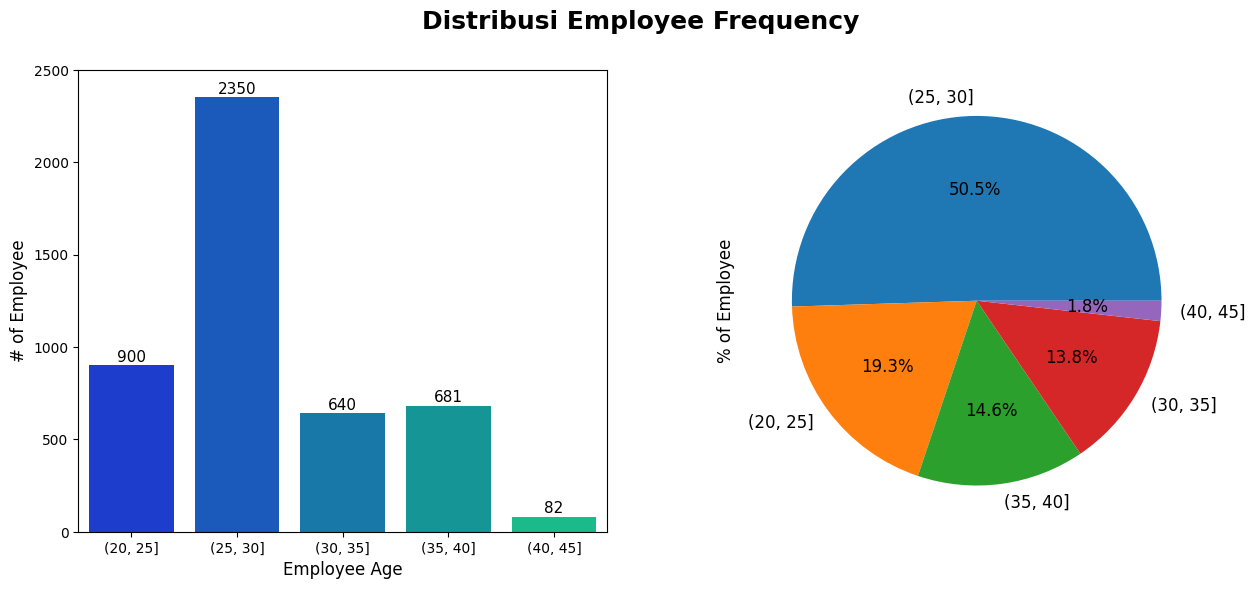

In [13]:
# Membuat visualisasi Distribusi Age berdasarkan Bins
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='AgeBin', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Employee Age", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi Employee Frequency', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,2500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 

df_eda['AgeBin'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

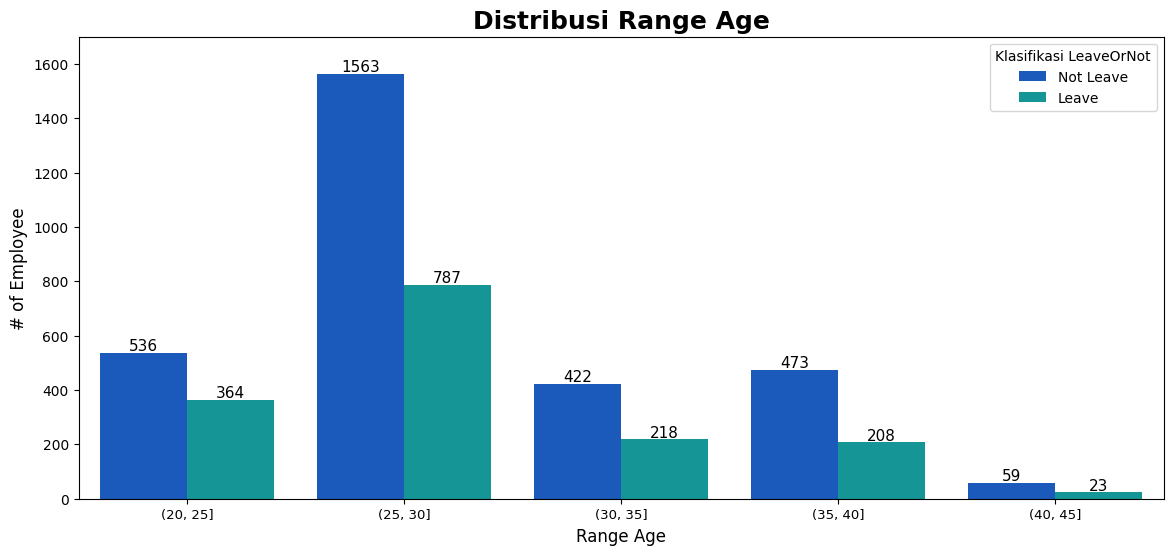

In [14]:
# Membuat Visualisasi distribusi Age berdasarkan LeaveOrNot
plt.figure(figsize=(14,6))

df_eda['AgeBin'] = df_eda['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]']

ax = sns.countplot(data = df_eda, x = 'AgeBin', hue="LeaveOrNot", palette = 'winter', order = AgeBin_order)

plt.title('Distribusi Range Age', fontsize=18, fontweight='bold')
plt.xlabel("Range Age", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(fontsize=10,title='Klasifikasi LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+25), ha='center', va='center',fontsize = 11) 
plt.ylim(0,1700)

plt.show()

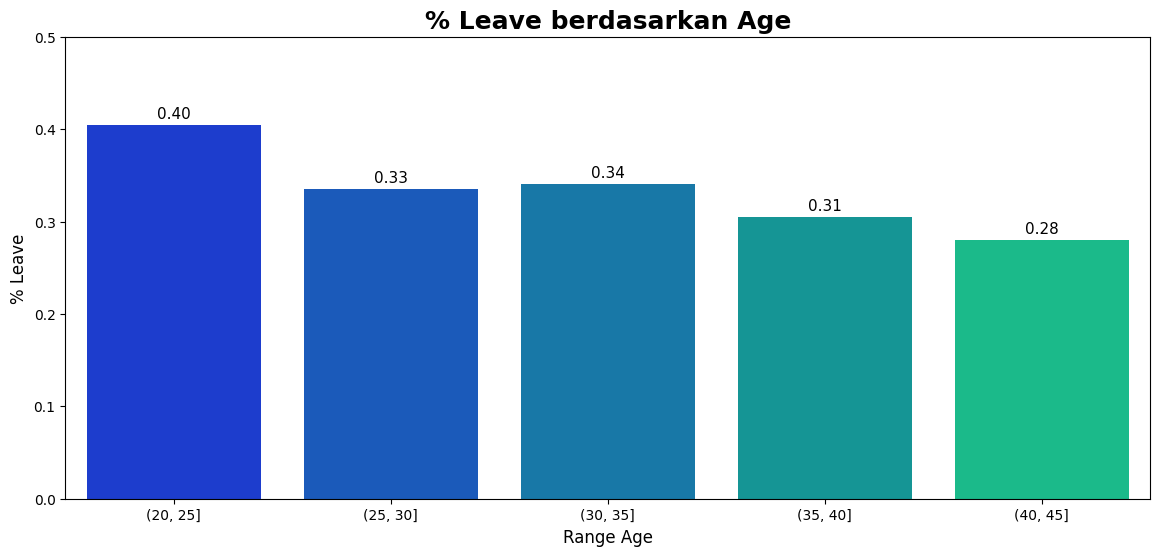

In [15]:
#Visualisasi % Leave or Not dari setiap kelas

plt.figure(figsize=(14,6))

ax = sns.barplot(x = 'AgeBin', y = 'LeaveOrNot', data = df_eda, palette = 'winter', order = AgeBin_order, errorbar=None)

plt.xlabel("Range Age", fontsize= 12)
plt.ylabel("% Leave", fontsize= 12)
plt.title('% Leave berdasarkan Age', fontsize=18, fontweight='bold')
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.012), ha='center', va='center',fontsize = 11) 

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Umur karyawan terpusat pada 25-30 tahun (2.350 karyawan/50.5%)
- Karyawan yang paling banyak *resign* adalah karyawan dengan *range* umur 25-30 tahun (787 karyawan). Kemungkinan banyak pada *range* ini karena, karyawan paling banyak pada *range* umur tersebut 
- Akan tetapi jika dilihat dari persentase *resign* pada setiap kelas, maka pada *range* umur 20-25 tahun memiliki persentase *resign* tertinggi. Kemudian pada *range* 25-40 tahun cenderung stabil dan persentase turun di angka 28% pada *range* 40-45 tahun
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `Age` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 2. Feature `ExperienceInCurrentDomain`

Pada *feature* `ExperienceInCurrentDomain`, yang ingin saya analisis adalah :

1. Distribusi `ExperienceInCurrentDomain`
2. `ExperienceInCurrentDomain` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `ExperienceInCurrentDomain` terhadap *resign* karyawan

In [16]:
#Menghitung value dari setiap tahun pengalaman
print(df_eda['ExperienceInCurrentDomain'].value_counts())

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64


Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas *resign* berdasarkan `ExperienceInCurrentDomain`

In [17]:
# ExperienceInCurrentDomain vs % Resign
df_eda['LeaveOrNot'].groupby(df_eda['ExperienceInCurrentDomain']).value_counts(normalize = True)

ExperienceInCurrentDomain  LeaveOrNot
0                          0             0.650704
                           1             0.349296
1                          0             0.663082
                           1             0.336918
2                          0             0.632935
                           1             0.367065
3                          0             0.619593
                           1             0.380407
4                          0             0.680988
                           1             0.319012
5                          0             0.686616
                           1             0.313384
6                          0             0.750000
                           1             0.250000
7                          0             0.666667
                           1             0.333333
Name: LeaveOrNot, dtype: float64

Kemudian akan saya akan visualisasikan untuk mempermudah pemahaman

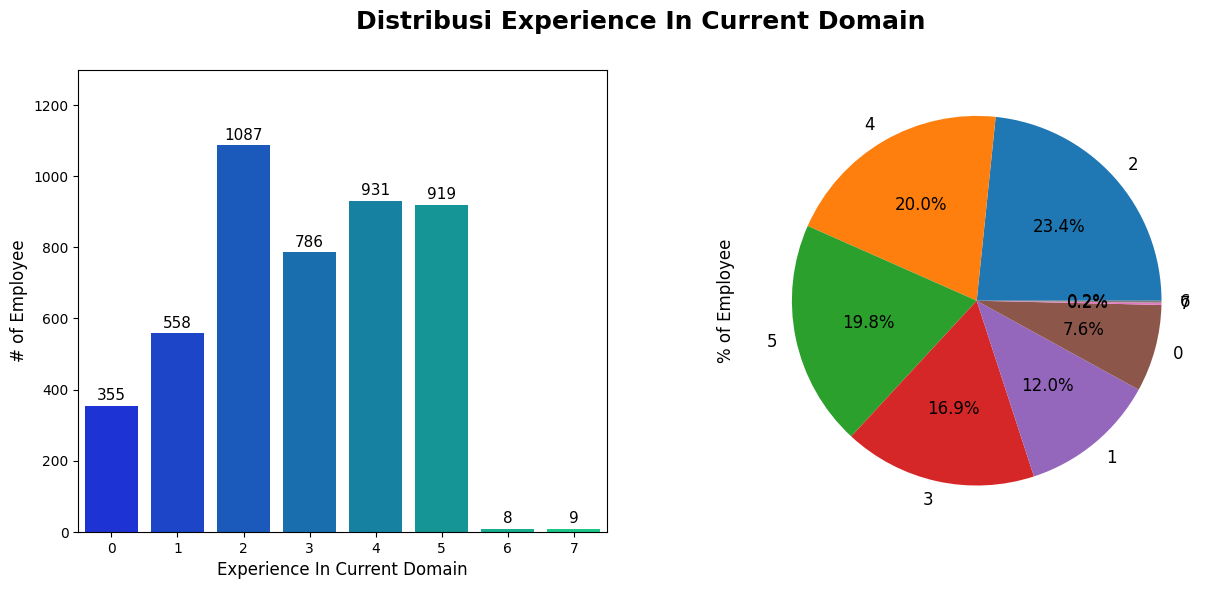

In [18]:
# Membuat visualisasi Distribusi ExperienceInCurrentDomain
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='ExperienceInCurrentDomain', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Experience In Current Domain", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi Experience In Current Domain', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,1300)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+30), ha='center', va='center',fontsize = 11) 

df_eda['ExperienceInCurrentDomain'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

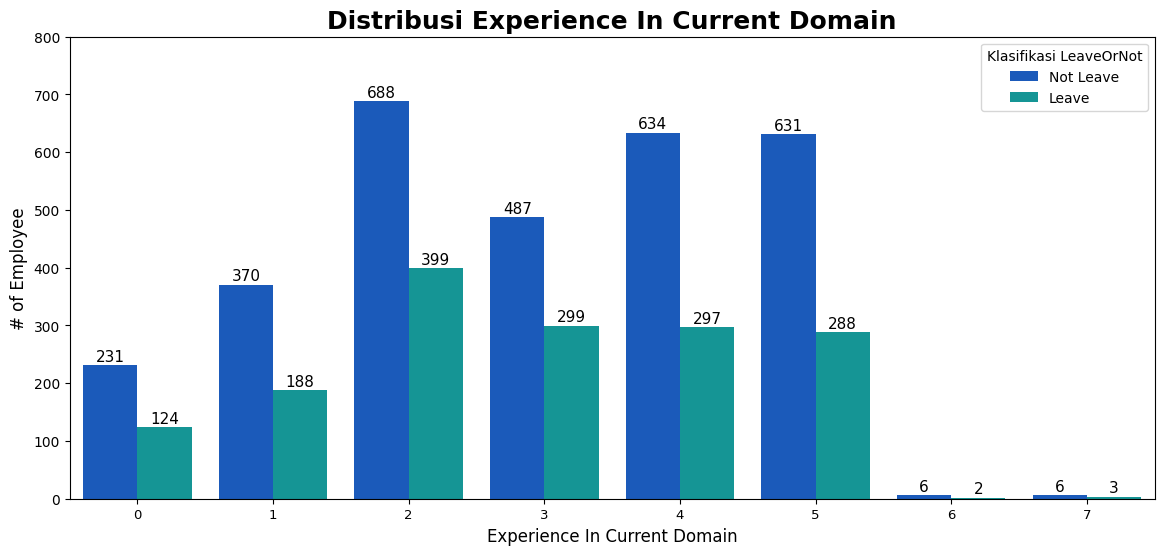

In [19]:
# Membuat Visualisasi distribusi ExperienceInCurrentDomain berdasarkan LeaveOrNot
plt.figure(figsize=(14,6))


ax = sns.countplot(data = df_eda, x = 'ExperienceInCurrentDomain', hue="LeaveOrNot", palette = 'winter')

plt.title('Distribusi Experience In Current Domain', fontsize=18, fontweight='bold')
plt.xlabel("Experience In Current Domain", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(fontsize=10,title='Klasifikasi LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+15), ha='center', va='center',fontsize = 11) 
plt.ylim(0,800)

plt.show()

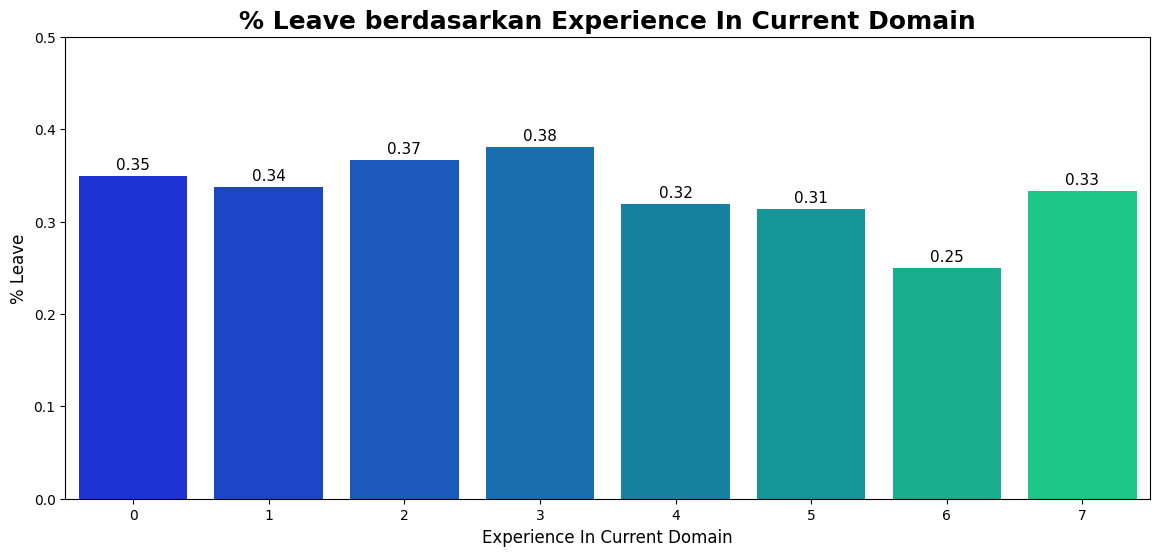

In [20]:
#Visualisasi % Leave or Not dari setiap kelas

plt.figure(figsize=(14,6))

ax = sns.barplot(x = 'ExperienceInCurrentDomain', y = 'LeaveOrNot', data = df_eda, palette = 'winter', errorbar=None)

plt.xlabel("Experience In Current Domain", fontsize= 12)
plt.ylabel("% Leave", fontsize= 12)
plt.title('% Leave berdasarkan Experience In Current Domain', fontsize=18, fontweight='bold')
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.012), ha='center', va='center',fontsize = 11) 

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Pengalaman karyawan pada domain-nya terpusat pada 2 tahun (1.087 karyawan/23.4%)
- Karyawan yang paling banyak *resign* adalah karyawan dengan *range* pengalaman 2 tahun (399 karyawan). Kemungkinan banyak pada *range* ini karena, karyawan paling banyak pada *range* pengalaman tersebut 
- Akan tetapi jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada setiap kelas pengalaman tidak jauh berbeda (sekitar 30%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `ExperienceInCurrentDomain` tidak berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 3. Feature `JoiningYear`

Pada *feature* `JoiningYear`, yang ingin saya analisis adalah :

1. Distribusi `JoiningYear`
2. `JoiningYear` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `JoiningYear` terhadap *resign* karyawan

In [21]:
#Menghitung distribusi JoiningYear
df_eda['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas `LeaveOrNot` berdasarkan `JoiningYear`

In [22]:
#Distribusi JoiningYear berdasarkan klasifikasi LeaveOrNot
df_eda['LeaveOrNot'].groupby(df_eda['JoiningYear']).value_counts(normalize = True)

JoiningYear  LeaveOrNot
2012         0             0.783730
             1             0.216270
2013         0             0.665172
             1             0.334828
2014         0             0.752504
             1             0.247496
2015         0             0.592830
             1             0.407170
2016         0             0.777143
             1             0.222857
2017         0             0.731949
             1             0.268051
2018         1             0.986376
             0             0.013624
Name: LeaveOrNot, dtype: float64

Kemudian saya visualisasikan untuk mempermudah pemahaman

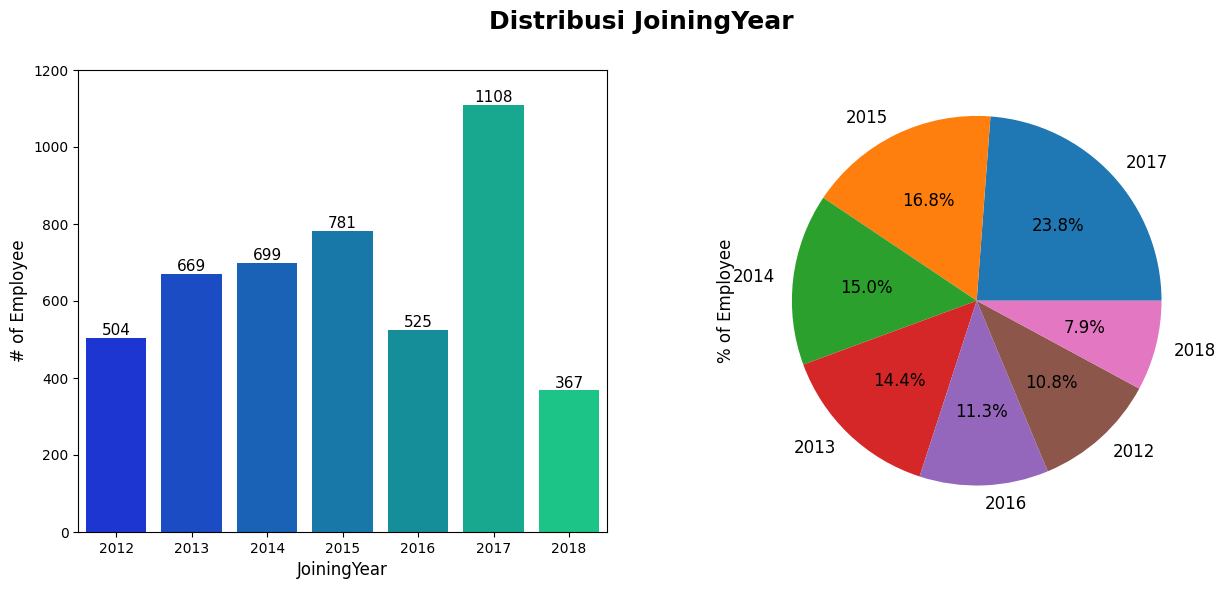

In [23]:
# Membuat visualisasi Distribusi JoiningYear
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='JoiningYear', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("JoiningYear", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi JoiningYear', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,1200)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+20), ha='center', va='center',fontsize = 11) 

df_eda['JoiningYear'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

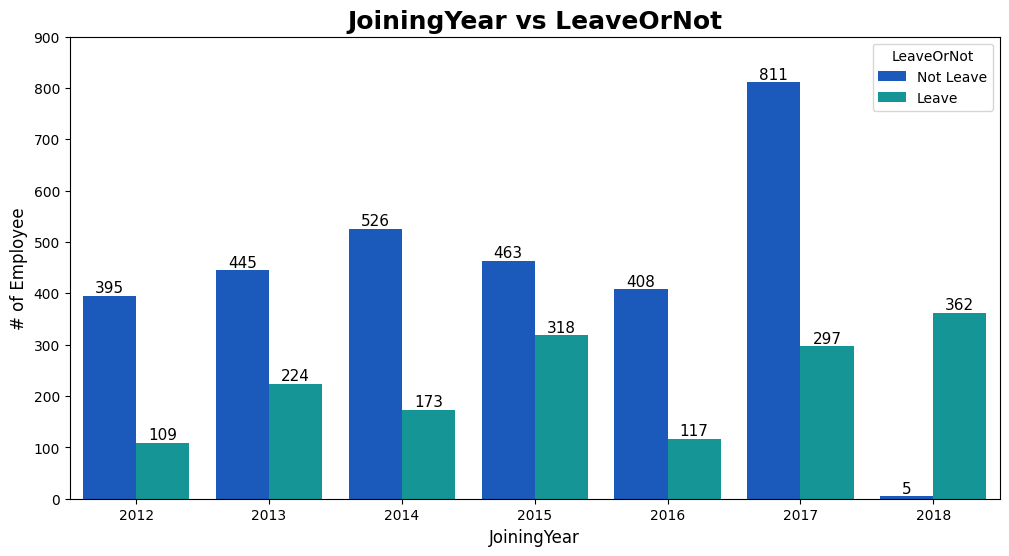

In [24]:
#Visualisasi distribusi JoiningYear berdasarkan klasifikasi LeaveOrNot
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'JoiningYear', hue="LeaveOrNot", palette = 'winter')

plt.xlabel("JoiningYear", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
plt.title('JoiningYear vs LeaveOrNot', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+15), ha='center', va='center',fontsize = 11) 
plt.ylim(0,900)
plt.show()

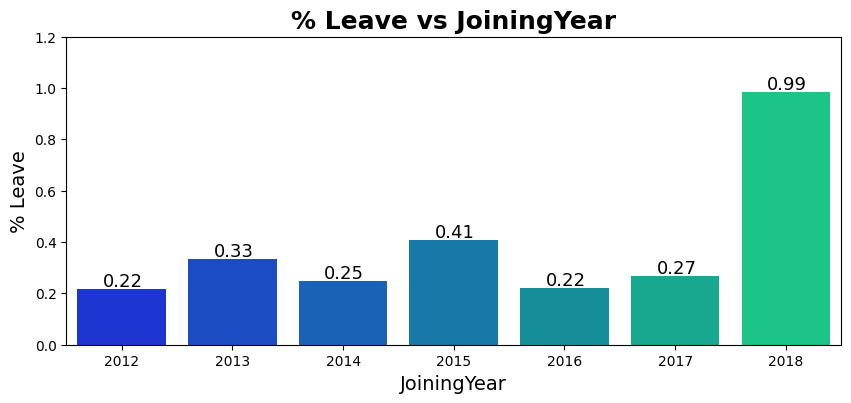

In [25]:
#Visualisasi persentase Leave berdasarkan JoiningYear
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "JoiningYear", y = "LeaveOrNot", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Leave", fontsize= 14)
plt.xlabel("JoiningYear", fontsize= 14)
plt.ylim(0,1.2)
plt.title('% Leave vs JoiningYear', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.23, p.get_height()+0.01),fontsize=13)

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Karyawan paling banyak bergabung pada tahun 2017 (1.108 karyawan/23.8%)
- Karyawan yang paling banyak *resign* adalah karyawan yang bergabung pada tahun 2018 (362 karyawan)
- Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* untuk karyawan yang bergabung pada tahun 2018 lebih besar dari tahun lain-nya (99%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `JoiningYear` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 4. Korelasi Antar *Numerical Feature* 

Selanjutnya adalah pengecekan korelasi antar *feature numeric*

C:\Users\USER\AppData\Local\Temp\ipykernel_18876\1848506812.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eda.corr(), annot = True, color = 'blue', cmap = 'YlGn')


<AxesSubplot: >

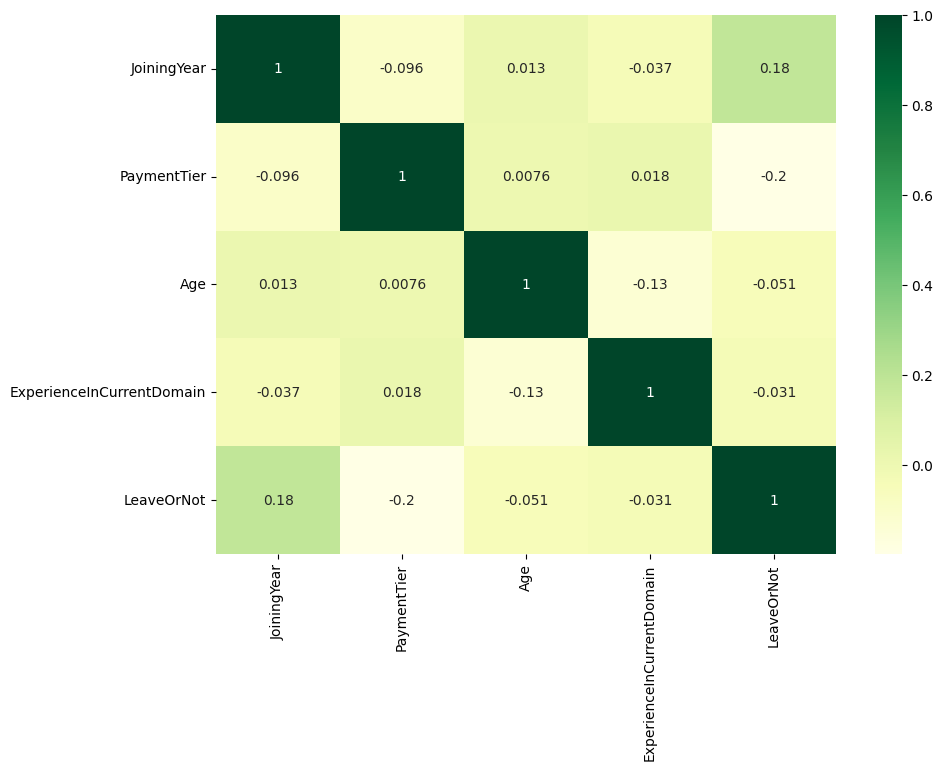

In [26]:
# Pembuatan heatmap untuk menunjukkan korelasi antar feature
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_eda.corr(), annot = True, color = 'blue', cmap = 'YlGn')

Dari informasi diatas dapat disimpulkan bahwa :

- *Joining year* memiliki korelasi positif lemah dengan *resign*. Artinya semakin tinggi tahun bergabungnya karyawan maka kemungkingan untuk *resign* akan semakin tinggi (tapi korelasinya lemah)
- *Tier payment* memiliki korelasi negatif lemah dengan *resign*. Artinya semakin rendah *tier payment* maka kemungkinan untuk *resign* akan semakin tinggi (tapi korelasinya lemah)
- Korelasi antar *feature* cenderung lemah


## 4.3 Exploratory *Categorical Feature*

Setelah *exploratory feature numerical* selanjutnya adalah *exploratory feature categorical*

### 1. Target `LeaveOrNot`

Pada *target* `LeaveOrNot`, yang ingin saya analisis adalah :

1. Balance dataset antara *leave* dan *not leave*

In [27]:
#Menghitung count unique value dari LeaveOrNot
print(df_eda['LeaveOrNot'].value_counts())

0    3053
1    1600
Name: LeaveOrNot, dtype: int64


Akan saya visualisasikan untuk mempermudah pemahaman

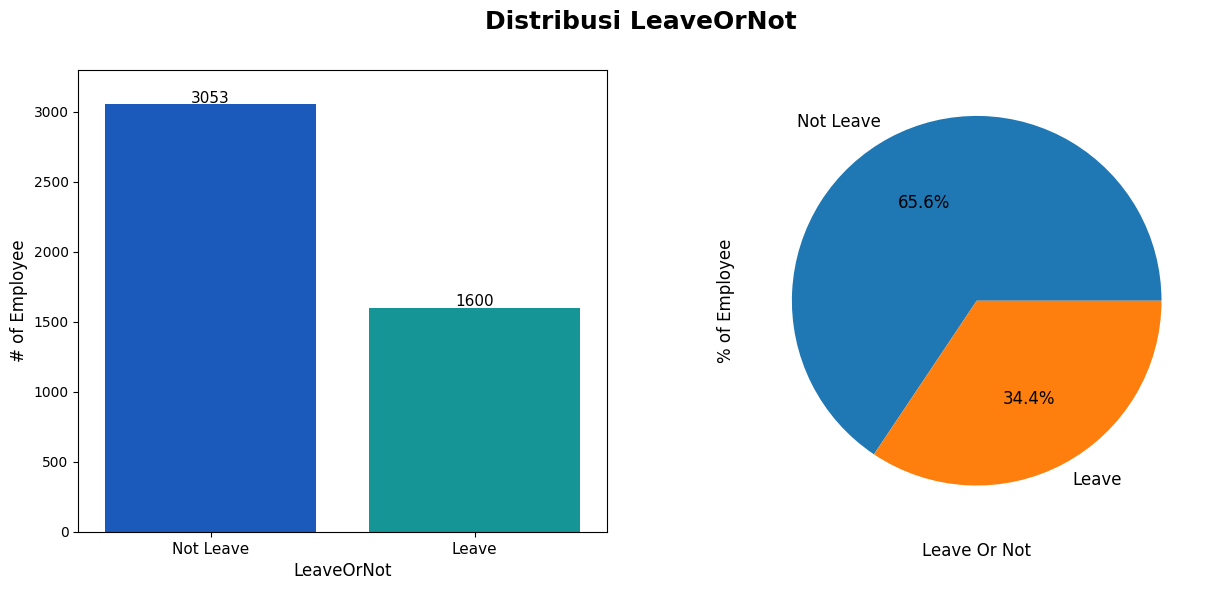

In [28]:
# Membuat visualisasi Distribusi LeaveOrNot
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='LeaveOrNot', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("LeaveOrNot", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi LeaveOrNot', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,3300)
plt.xlabel("Leave Or Not", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
ax[0].set_xticks([0,1], ['Not Leave', 'Leave'], fontsize = 11)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 

df_eda['LeaveOrNot'].value_counts().plot(kind='pie', labels = ['Not Leave','Leave'],autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :

- Karyawan yang tidak *resign* lebih banyak dari pada karyawan yang *resign* dengan perbandingan 2 (65.6%) : 1 (34.4%)

### 2. Feature `Education`

Pada *feature* `Education`, yang ingin saya analisis adalah :

1. Distribusi `Education`
2. `Education` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `Education` terhadap *resign* karyawan

In [29]:
#Menghitung distribusi Education
df_eda['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas `LeaveOrNot` berdasarkan `Education`

In [30]:
#Distribusi Education berdasarkan klasifikasi LeaveOrNot
df_eda['LeaveOrNot'].groupby(df_eda['Education']).value_counts(normalize = True)

Education  LeaveOrNot
Bachelors  0             0.686476
           1             0.313524
Masters    0             0.512027
           1             0.487973
PHD        0             0.748603
           1             0.251397
Name: LeaveOrNot, dtype: float64

Kemudian saya visualisasikan untuk mempermudah pemahaman

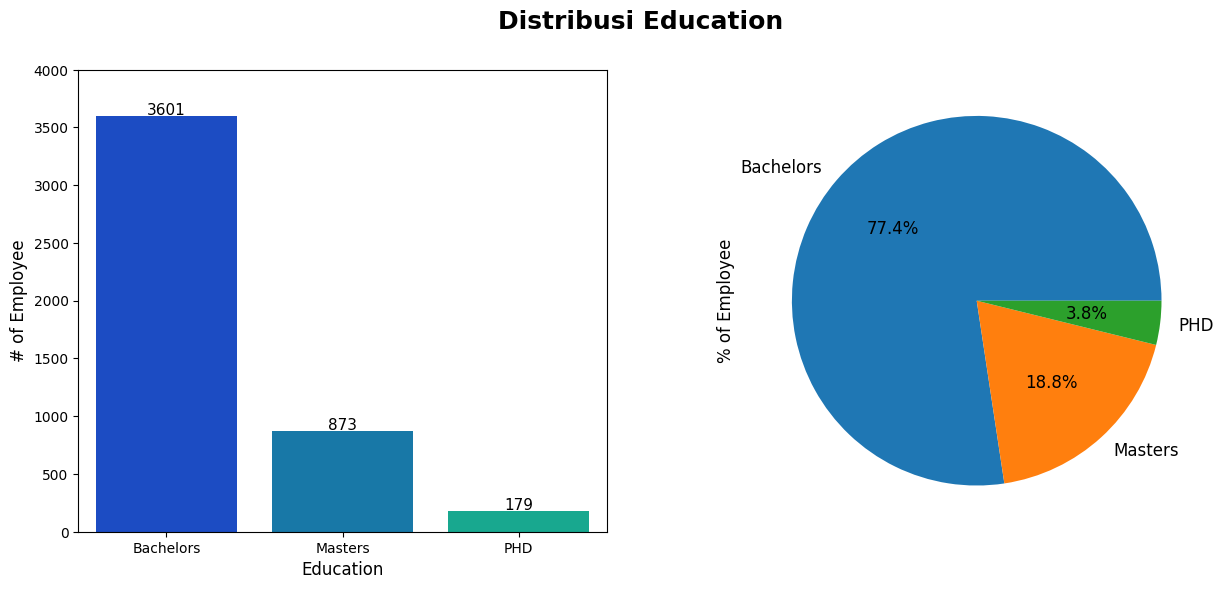

In [31]:
# Membuat visualisasi Distribusi Education
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='Education', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Education", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi Education', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,4000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 11) 

df_eda['Education'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

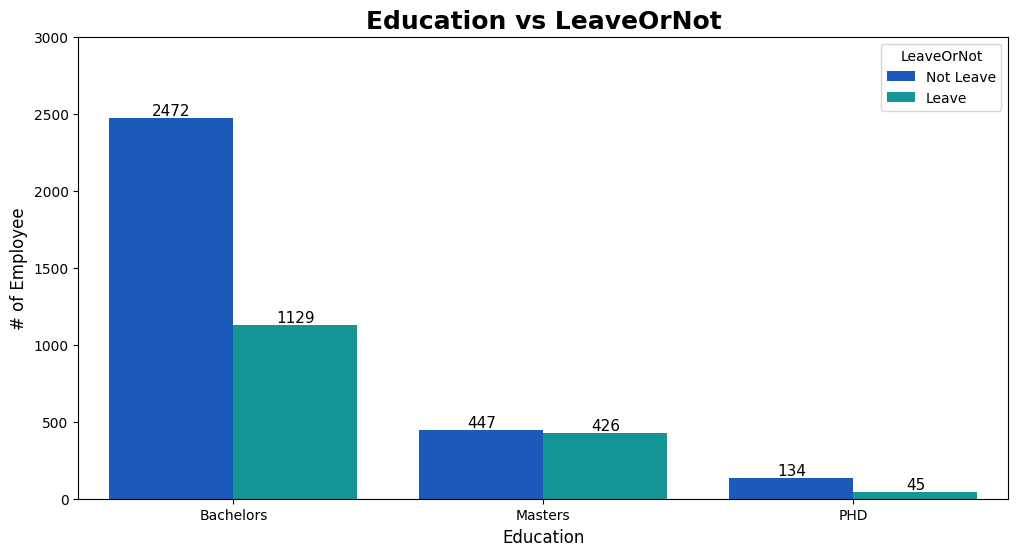

In [32]:
#Visualisasi distribusi Education berdasarkan klasifikasi LeaveOrNot
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'Education', hue="LeaveOrNot", palette = 'winter')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
plt.title('Education vs LeaveOrNot', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 
plt.ylim(0,3000)
plt.show()

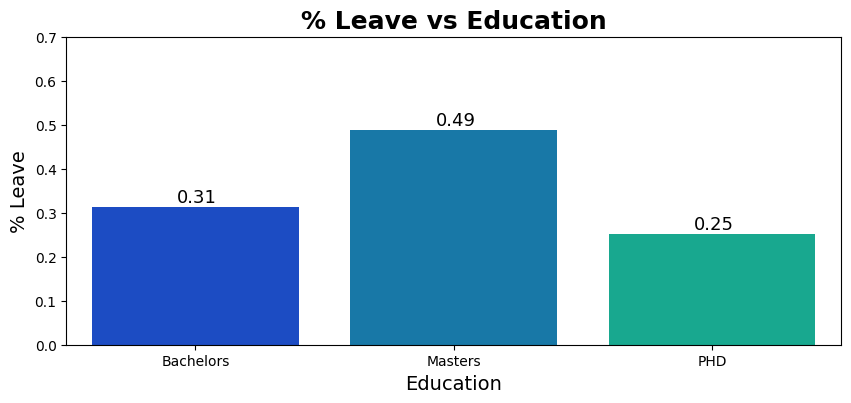

In [33]:
#Visualisasi persentase Leave berdasarkan Education
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "Education", y = "LeaveOrNot", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Leave", fontsize= 14)
plt.xlabel("Education", fontsize= 14)
plt.ylim(0,0.7)
plt.title('% Leave vs Education', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.33, p.get_height()+0.01),fontsize=13)

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- *Education* karyawan terbanyak adalah pada level *bachelors* (3.601 karyawan/77.4%)
- Karyawan yang paling banyak *resign* adalah karyawan dengan level edukasi *bachelors* (1.129 karyawan). Kemungkinan banyak pada level ini karena, karyawan paling banyak pada level edukasi tersebut 
- Akan tetapi jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada level edukasi *masters* lebih tinggi dari pada level edukasi lainnya (49%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `Education` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 3. Feature `City`

Pada *feature* `City`, yang ingin saya analisis adalah :

1. Distribusi `City`
2. `City` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `City` terhadap *resign* karyawan

In [34]:
#Menghitung distribusi City
df_eda['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas `LeaveOrNot` berdasarkan `City`

In [35]:
#Distribusi City berdasarkan klasifikasi LeaveOrNot
df_eda['LeaveOrNot'].groupby(df_eda['City']).value_counts(normalize = True)

City       LeaveOrNot
Bangalore  0             0.732944
           1             0.267056
New Delhi  0             0.683665
           1             0.316335
Pune       1             0.503943
           0             0.496057
Name: LeaveOrNot, dtype: float64

Kemudian saya visualisasikan untuk mempermudah pemahaman

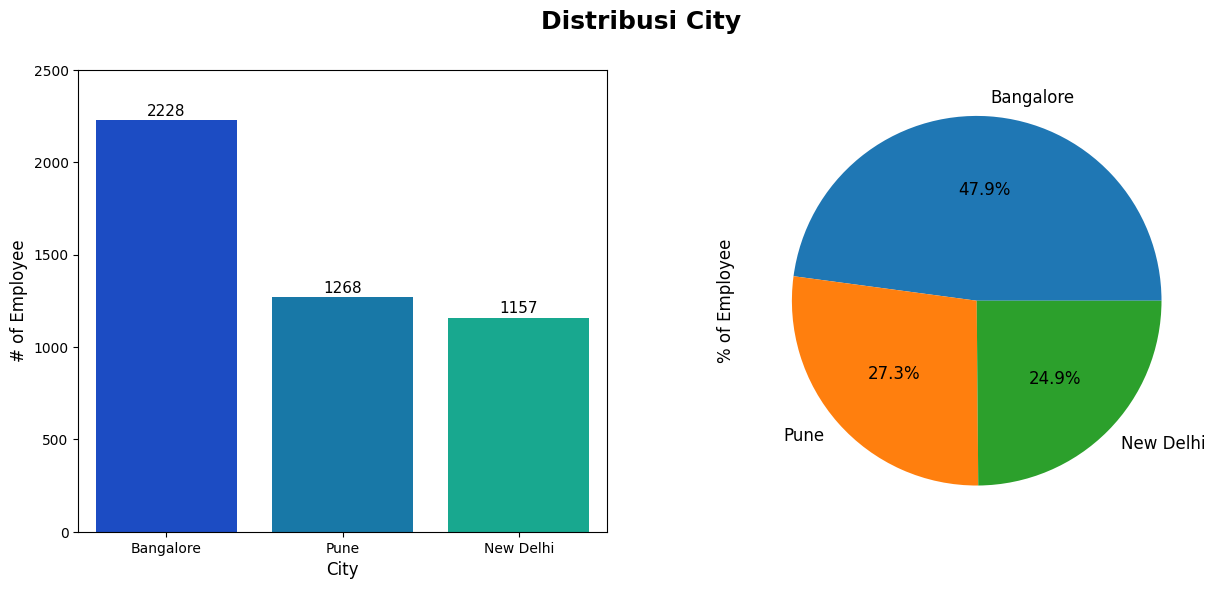

In [36]:
# Membuat visualisasi Distribusi City
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='City', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("City", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi City', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,2500)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 11) 

df_eda['City'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

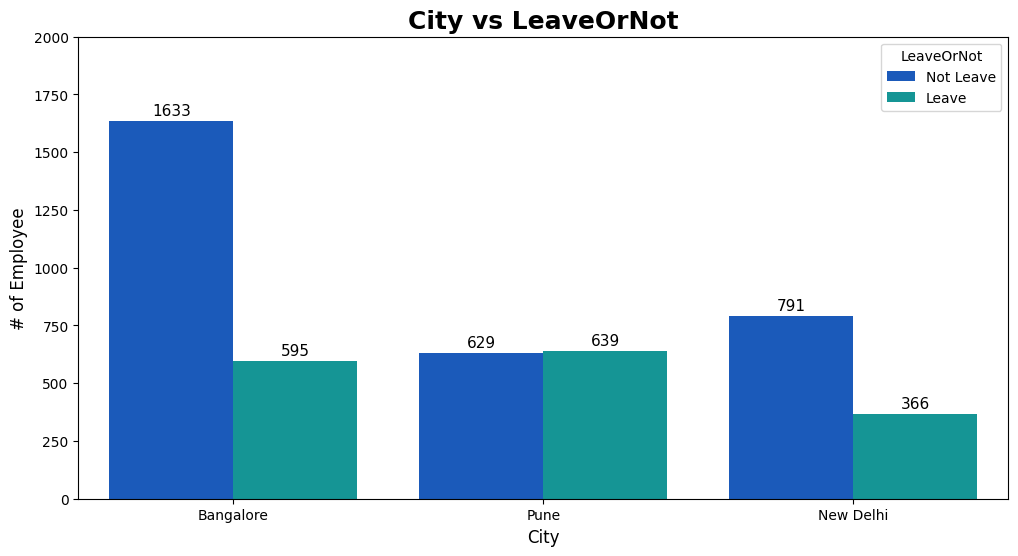

In [37]:
#Visualisasi distribusi City berdasarkan klasifikasi LeaveOrNot
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'City', hue="LeaveOrNot", palette = 'winter')

plt.xlabel("City", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
plt.title('City vs LeaveOrNot', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 
plt.ylim(0,2000)
plt.show()

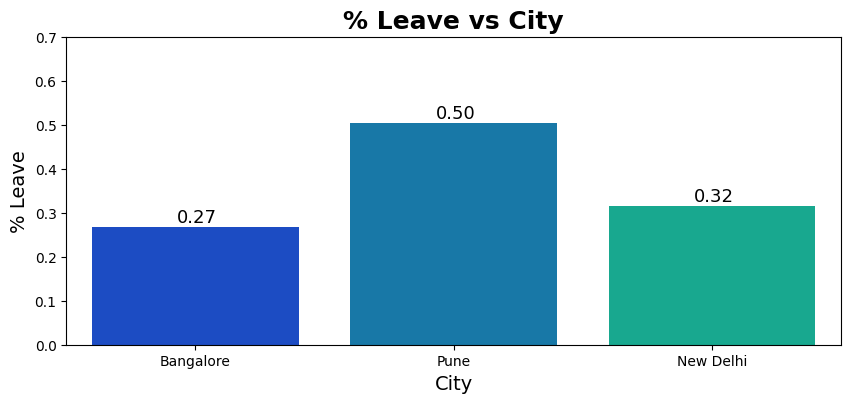

In [38]:
#Visualisasi persentase Leave berdasarkan City
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "City", y = "LeaveOrNot", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Leave", fontsize= 14)
plt.xlabel("City", fontsize= 14)
plt.ylim(0,0.7)
plt.title('% Leave vs City', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.33, p.get_height()+0.01),fontsize=13)

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Karyawan banyak yang bekerja pada kota Bangalore (2.228 karyawan/47.9%)
- Karyawan yang paling banyak *resign* adalah karyawan yang bekerja di kota Pune (639 karyawan)
- Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada karyawan yang bekerja di kota Pune lebih tinggi dari pada karyawan yang bekerja di kota lainnya (50%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `City` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 4. Feature `Gender`

Pada *feature* `Gender`, yang ingin saya analisis adalah :

1. Distribusi `Gender`
2. `Gender` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `Gender` terhadap *resign* karyawan

In [39]:
#Menghitung distribusi Gender
df_eda['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas `LeaveOrNot` berdasarkan `Gender`

In [40]:
#Distribusi Gender berdasarkan klasifikasi LeaveOrNot
df_eda['LeaveOrNot'].groupby(df_eda['Gender']).value_counts(normalize = True)

Gender  LeaveOrNot
Female  0             0.528533
        1             0.471467
Male    0             0.742261
        1             0.257739
Name: LeaveOrNot, dtype: float64

Kemudian saya visualisasikan untuk mempermudah pemahaman

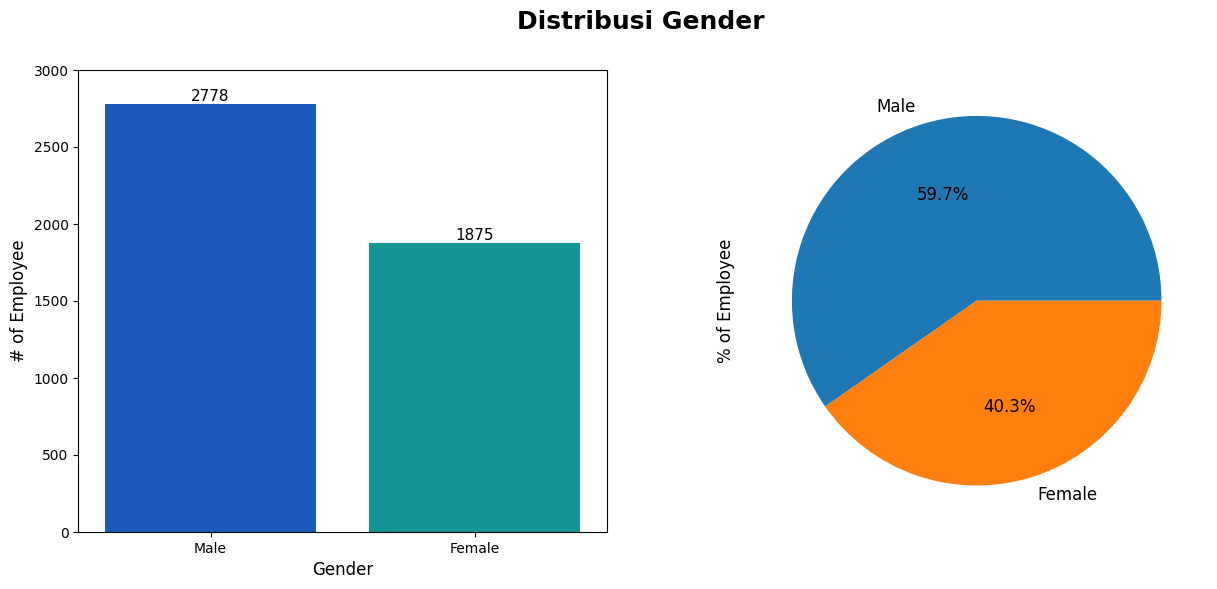

In [41]:
# Membuat visualisasi Distribusi Gender
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='Gender', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Gender", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi Gender', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,3000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 11) 

df_eda['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

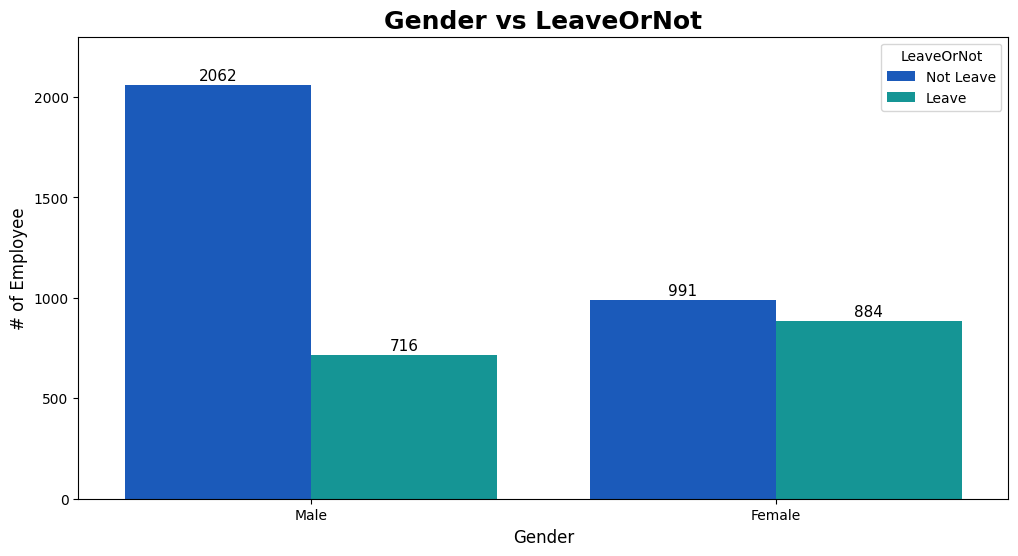

In [42]:
#Visualisasi distribusi Gender berdasarkan klasifikasi LeaveOrNot
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'Gender', hue="LeaveOrNot", palette = 'winter')

plt.xlabel("Gender", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
plt.title('Gender vs LeaveOrNot', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 
plt.ylim(0,2300)
plt.show()

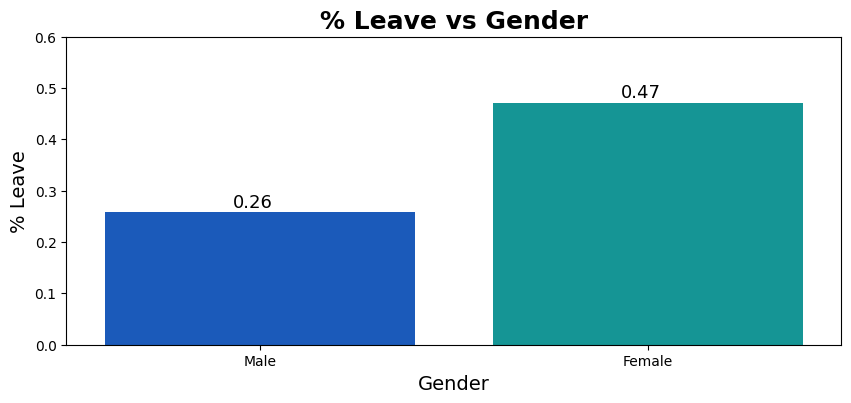

In [43]:
#Visualisasi persentase Leave berdasarkan Gender
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "Gender", y = "LeaveOrNot", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Leave", fontsize= 14)
plt.xlabel("Gender", fontsize= 14)
plt.ylim(0,0.6)
plt.title('% Leave vs Gender', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.33, p.get_height()+0.01),fontsize=13)

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Karyawan yang bekerja paling banyak memiliki *gender* pria (2.778 karyawan/59.7%)
- Karyawan yang paling banyak *resign* adalah karyawan dengan *gender* wanita (884 karyawan)
- Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada *gender* wanita lebih banyak dari pada *gender* pria (47%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `Gender` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 5. Feature `EverBenched`

Pada *feature* `EverBenched`, yang ingin saya analisis adalah :

1. Distribusi `EverBenched`
2. `EverBenched` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `EverBenched` terhadap *resign* karyawan

In [44]:
#Menghitung distribusi EverBenched
df_eda['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas `LeaveOrNot` berdasarkan `EverBenched`

In [45]:
#Distribusi EverBenched berdasarkan klasifikasi LeaveOrNot
df_eda['LeaveOrNot'].groupby(df_eda['EverBenched']).value_counts(normalize = True)

EverBenched  LeaveOrNot
No           0             0.668743
             1             0.331257
Yes          0             0.546025
             1             0.453975
Name: LeaveOrNot, dtype: float64

Kemudian saya visualisasikan untuk mempermudah pemahaman

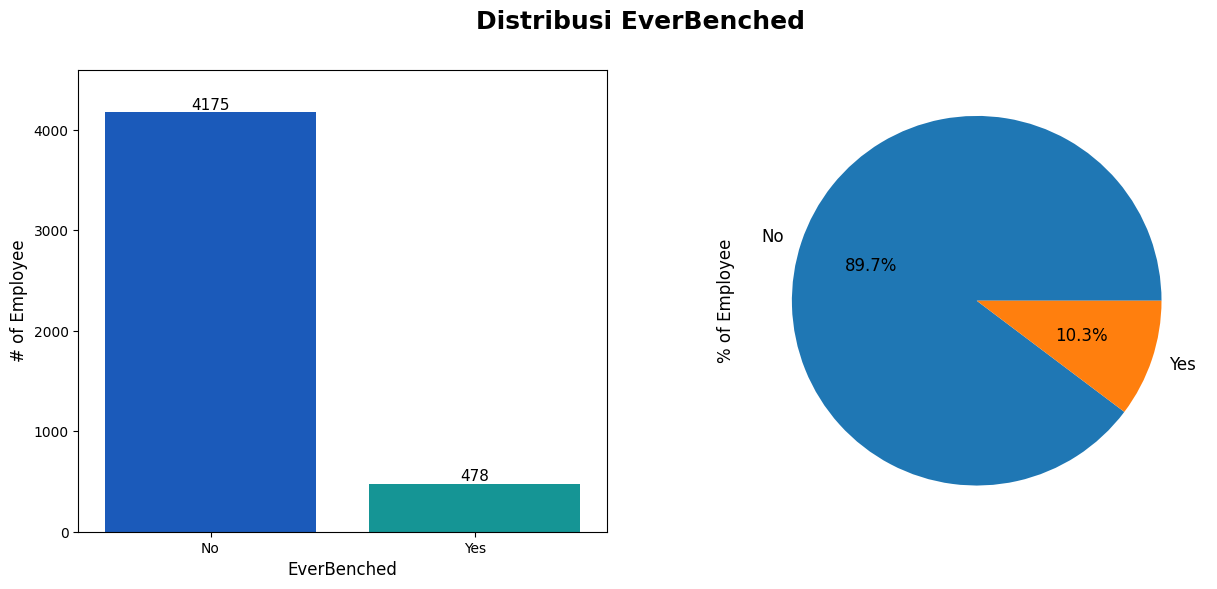

In [46]:
# Membuat visualisasi Distribusi EverBenched
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='EverBenched', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("EverBenched", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi EverBenched', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,4600)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+70), ha='center', va='center',fontsize = 11) 

df_eda['EverBenched'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

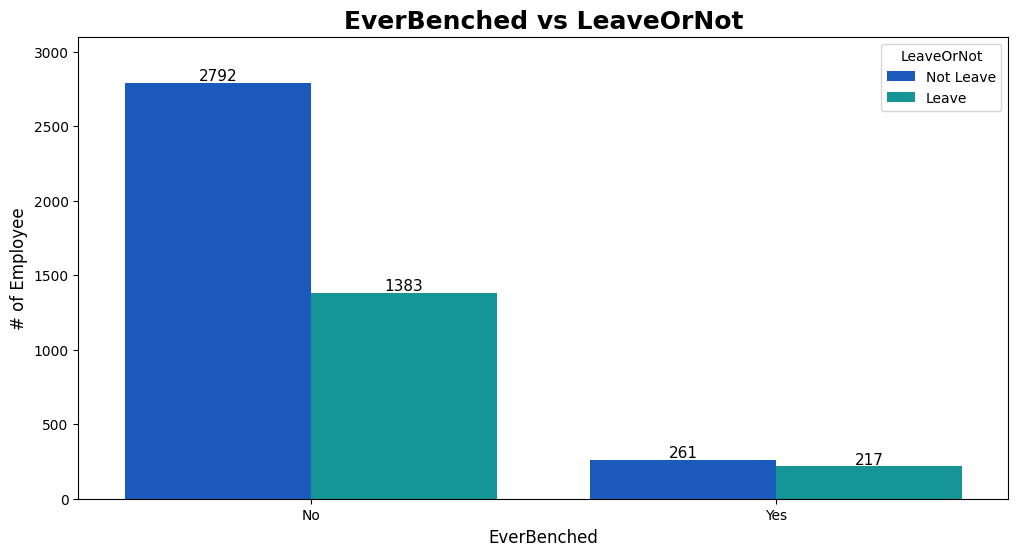

In [47]:
#Visualisasi distribusi EverBenched berdasarkan klasifikasi LeaveOrNot
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'EverBenched', hue="LeaveOrNot", palette = 'winter')

plt.xlabel("EverBenched", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
plt.title('EverBenched vs LeaveOrNot', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 
plt.ylim(0,3100)
plt.show()

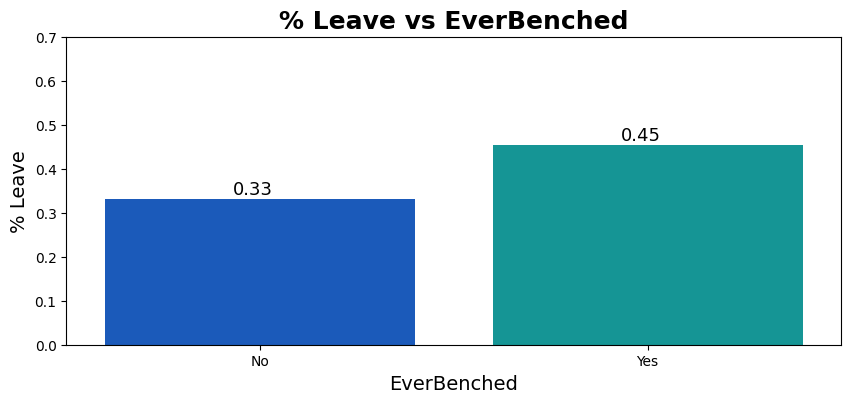

In [48]:
#Visualisasi persentase Leave berdasarkan EverBenched
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "EverBenched", y = "LeaveOrNot", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Leave", fontsize= 14)
plt.xlabel("EverBenched", fontsize= 14)
plt.ylim(0,0.7)
plt.title('% Leave vs EverBenched', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.33, p.get_height()+0.01),fontsize=13)

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Karyawan yang tidak pernah memegang *project* > 1 bulan lebih banyak dari yang pernah memegang *project* (4.175 karyawan/89.7%)
- Karyawan yang paling banyak *resign* adalah karyawan yang tidak pernah memegang *project* > 1 bulan (1.383 karyawan). Kemungkinan banyak pada kelas ini karena, karyawan paling banyak pada kelas tersebut
- Akan tetapi jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada karyawan yang pernah memegang *project* > 1 bulan lebih tinggi dari pada yang tidak pernah memegang *project* > 1 bulan (45%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `EverBenched` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

### 6. Feature `PaymentTier`

Pada *feature* `PaymentTier`, yang ingin saya analisis adalah :

1. Distribusi `PaymentTier`
2. `PaymentTier` karyawan dengan *resign* terbanyak
3. Melihat pengaruh `PaymentTier` terhadap *resign* karyawan

In [49]:
#Menghitung distribusi PaymentTier
df_eda['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

Untuk *insight* akan saya kelompokkan setelah visualisasi. Selanjutnya saya akan membuat *query* persentase kelas `LeaveOrNot` berdasarkan `PaymentTier`

In [50]:
#Distribusi PaymentTier berdasarkan klasifikasi LeaveOrNot
df_eda['LeaveOrNot'].groupby(df_eda['PaymentTier']).value_counts(normalize = True)

PaymentTier  LeaveOrNot
1            0             0.633745
             1             0.366255
2            1             0.599129
             0             0.400871
3            0             0.724800
             1             0.275200
Name: LeaveOrNot, dtype: float64

Kemudian saya visualisasikan untuk mempermudah pemahaman

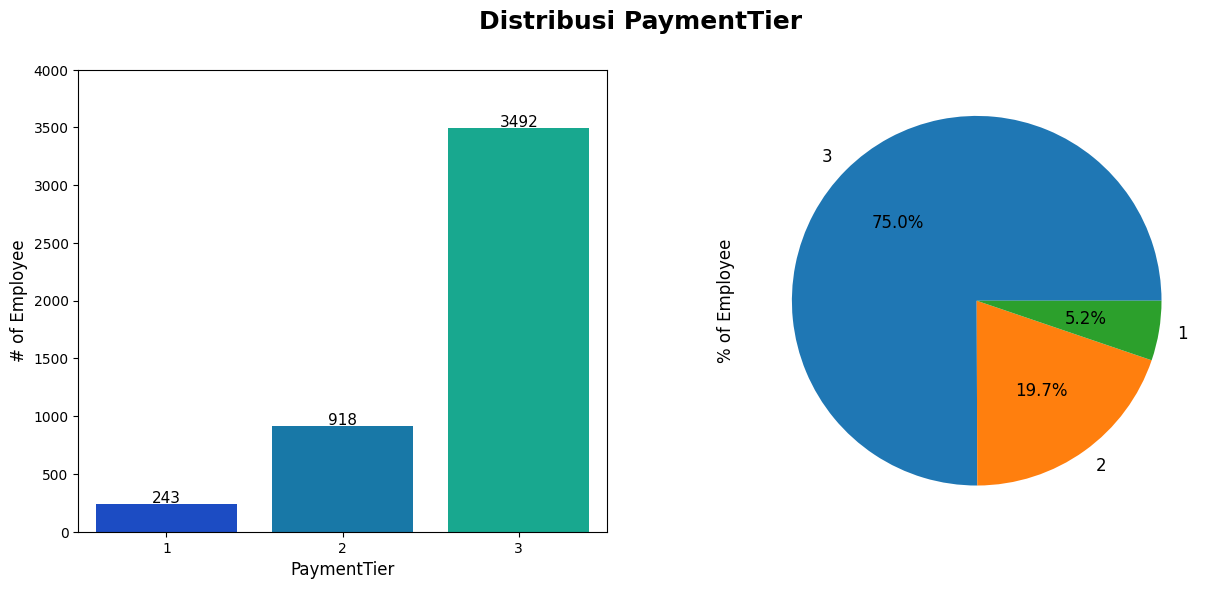

In [51]:
# Membuat visualisasi Distribusi PaymentTier
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='PaymentTier', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("PaymentTier", fontsize= 12)
ax[0].set_ylabel("# of Employee", fontsize= 12)
fig.suptitle('Distribusi PaymentTier', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,4000)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+50), ha='center', va='center',fontsize = 11) 

df_eda['PaymentTier'].value_counts().plot(kind='pie',autopct='%1.1f%%', textprops = {"fontsize":12})
ax[1].set_ylabel("% of Employee", fontsize= 12)
plt.show()

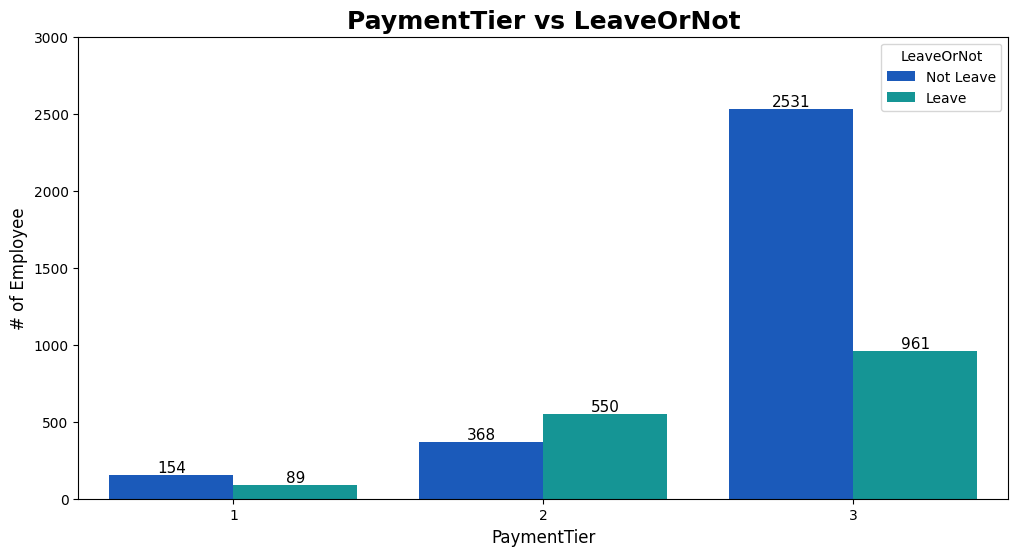

In [52]:
#Visualisasi distribusi PaymentTier berdasarkan klasifikasi LeaveOrNot
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'PaymentTier', hue="LeaveOrNot", palette = 'winter')

plt.xlabel("PaymentTier", fontsize= 12)
plt.ylabel("# of Employee", fontsize= 12)
plt.title('PaymentTier vs LeaveOrNot', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='LeaveOrNot', loc='upper right', labels=['Not Leave', 'Leave'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11) 
plt.ylim(0,3000)
plt.show()

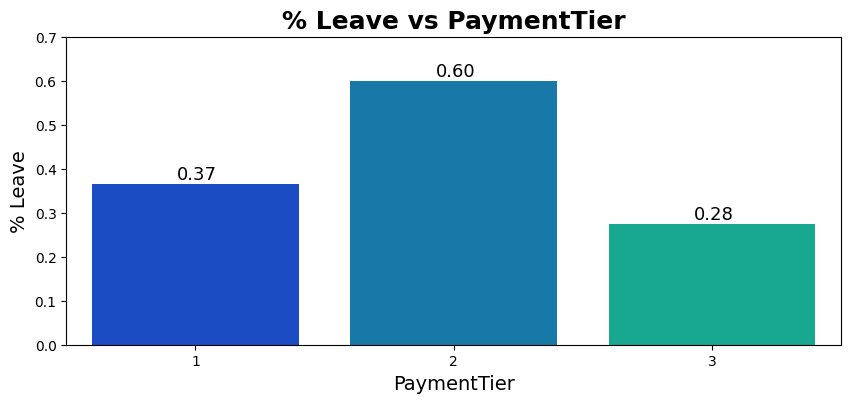

In [53]:
#Visualisasi persentase Leave berdasarkan PaymentTier
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "PaymentTier", y = "LeaveOrNot", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Leave", fontsize= 14)
plt.xlabel("PaymentTier", fontsize= 14)
plt.ylim(0,0.7)
plt.title('% Leave vs PaymentTier', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.33, p.get_height()+0.01),fontsize=13)

plt.show()

Berdasarkan 3 visualisasi diatas dapat disimpulkan bahwa :

- Karyawan banyak yang memiliki gaji dengan *tier* 3 (3.492 karyawan/75%)
- Karyawan yang paling banyak *resign* adalah karyawan dengan gaji *tier* 3 (961 karyawan). Kemungkinan banyak pada kelas ini karena, karyawan paling banyak pada *tier* gaji tersebut
- Akan tetapi jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada kelas gaji *tier* 2 lebih tinggi dari pada *tier* lainnya (60%)
- Dari 3 informasi diatas dapat disimpulkan bahwa, ***feature* `PaymentTier` berpengaruh terhadap `LeaveOrNot`. Hal ini akan saya *crosscheck* pada poin *feature engineering* (EDA hanya berfungsi sebagai pendukung pengambilan keputusan)**

# 5 - Data *Preprocessing*

Setelah memahami data, selanjutnya adalah mempersiapkan dataset untuk membuat model prediksi

## 5.1 Split between `X` (Features) and `y` (Target)

Yang pertama adalah split X (*features*) dan y (*target*). y *target* adalah *feature* `LeaveOrNot` sedangkan X adalah semua feature kecuali `LeaveOrNot`. Hal ini dilakukan sebelum *feature selection* agar **tidak ada kebocoran data (*leakage*)** saat melakukan *feature selection* (jadi **data untuk *feature selection* murni dari X_train**)

In [54]:
#Definisi variabel X dan y
X = df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

Selanjutnya adalah menampilkan X dan y

In [55]:
#Menampilkan X
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4
4649,Masters,2013,Pune,2,37,Male,No,2
4650,Masters,2018,New Delhi,3,27,Male,No,5
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2


In [56]:
#Menampilkan y
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

## 5.2 Split between Train-Set and Test-Set

Selanjutnya adalah *split train-set dan test-set*. *Train-set* menggunakan 80% data sedangkan *Test-set* menggunakan 20% data sesuai dengan `pareto principle` (https://en.wikipedia.org/wiki/Pareto_principle).

Split *train-set* dan *test-set* **juga menggunakan stratifikasi** karena **data imbalance**

In [57]:
#Split X train, X test, y train dan y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3722, 8)
Test Size  :  (931, 8)


Kemudian mencoba keberhasilan split

In [58]:
#print X_train
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
1797,Bachelors,2013,Pune,2,27,Female,No,5
4623,PHD,2013,Bangalore,3,24,Male,No,2
748,Bachelors,2013,Pune,3,27,Male,No,5
2673,Bachelors,2013,New Delhi,3,28,Female,No,3
3719,Bachelors,2015,Pune,2,36,Female,No,0
...,...,...,...,...,...,...,...,...
3506,Bachelors,2013,Pune,3,37,Male,No,2
1117,Bachelors,2012,Bangalore,3,27,Male,Yes,5
1247,PHD,2013,New Delhi,3,24,Male,No,2
3134,Bachelors,2016,Pune,3,31,Male,No,1


## 5.3 Handling Outlier

Selanjutnya adalah handling outlier pada variabel `X_train` . Yang pertama adalah melakukan pengecekan pada setiap *feature numeric* untuk mengetahui apakah terdapat *outlier* atau tidak

In [59]:
#Definisi fungsi untuk membuat boxplot dan histogram dari setiap feature numeric

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

    #Cek skew feature
    print('\nSkewness Value ',variable, ' : ' , df[variable].skew())

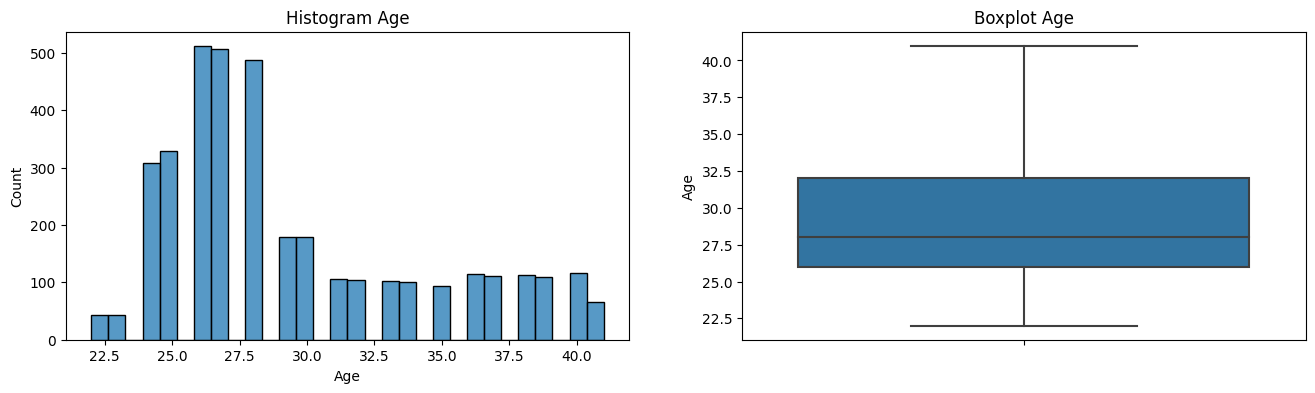


Skewness Value  Age  :  0.8898324467153346


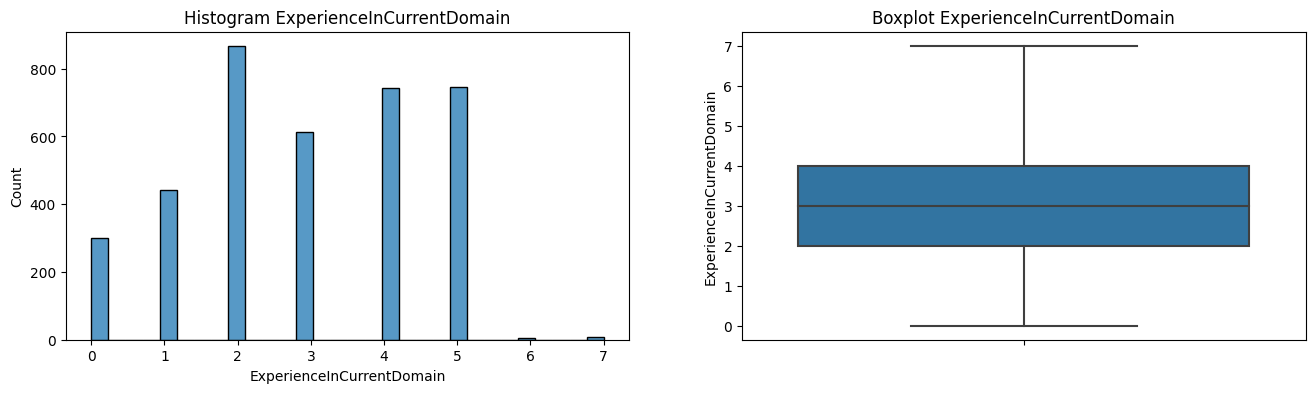


Skewness Value  ExperienceInCurrentDomain  :  -0.16370000298133214


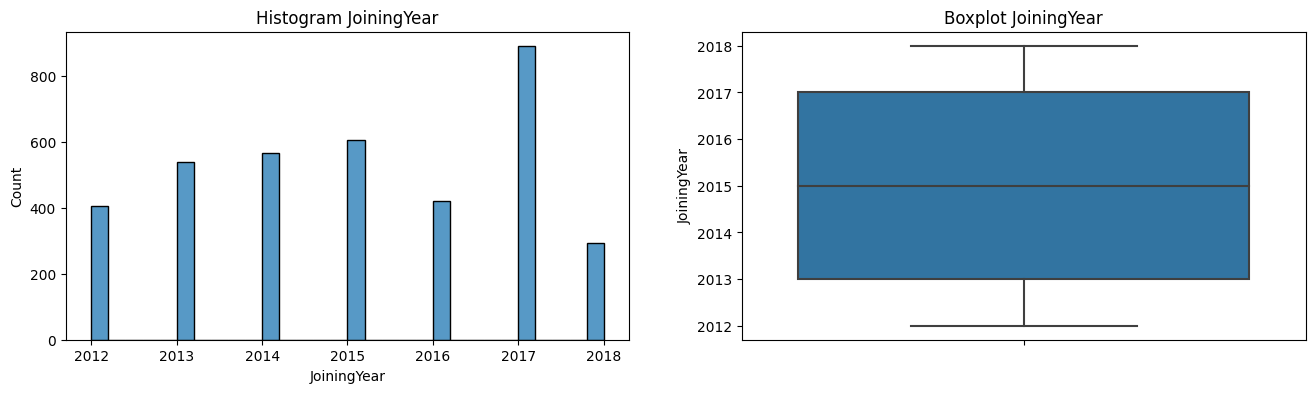


Skewness Value  JoiningYear  :  -0.10912334295026749


In [60]:
#Pengecekan distribusi dan skew dari setiap feature numeric
for i in df_num_columns:
    diagnostic_plots(X_train, i)

Dari visualisasi diatas dapat disimpulkan bahwa *feature* `Age` berdistribusi *right skew* sedangkan *feature* `ExperienceInCurrentDomain` dan *feature* `JoiningYear` berdistribusi normal. Kemudian akan saya coba cek persentase *outlier* dari setiap *feature*

In [61]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    global interq
    global lower_boundary
    global upper_boundary
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary

In [62]:
#Pengecekan persentase outlier dari semua feature numerical
for i in df_num_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('Lower Boundary Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[1]),2))
    print('Upper Boundary Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[2]),2))
    print('---')

Age
Jumlah Outlier Feature  Age adalah  0
Persentase Outlier Feature  Age adalah  0.0
Lower Boundary Feature  Age adalah  17.0
Upper Boundary Feature  Age adalah  41.0
---
ExperienceInCurrentDomain
Jumlah Outlier Feature  ExperienceInCurrentDomain adalah  0
Persentase Outlier Feature  ExperienceInCurrentDomain adalah  0.0
Lower Boundary Feature  ExperienceInCurrentDomain adalah  -1.82
Upper Boundary Feature  ExperienceInCurrentDomain adalah  7.62
---
JoiningYear
Jumlah Outlier Feature  JoiningYear adalah  0
Persentase Outlier Feature  JoiningYear adalah  0.0
Lower Boundary Feature  JoiningYear adalah  2009.45
Upper Boundary Feature  JoiningYear adalah  2020.66
---


Karena tidak ada *outlier* maka tidak diperlukan *outlier handling* 

## 5.4 Handling Missing Values

Selanjutnya adalah handling missing value pada `X_train` , `y_train` , `X_test` dan `y_test`

### Handling Missing Values `X_train`

Saya akan coba cek missing values pada variabel `X_train`

In [63]:
#Pengecekan null values pada X_train
X_train.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

Pada `X_train` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

### Handling Missing Values `y_train`

Saya akan coba cek missing values pada variabel `y_train`

In [64]:
#Pengecekan null values pada y_train
y_train.isnull().sum()

0

Pada `y_train` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

### Handling Missing Values `X_test`

Saya akan coba cek missing values pada variabel `X_test`

In [65]:
#Pengecekan null values pada X_test
X_test.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

Pada `X_test` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

### Handling Missing Values `y_test`

Saya akan coba cek missing values pada variabel `y_test`

In [66]:
#Pengecekan null values pada y_test
y_test.isnull().sum()

0

Pada `y_test` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

## 5.5 Feature Selection

Untuk *feature selection* dibagi menjadi 2, yaitu *feature selection* untuk *numerical feature* dan *feature selection* untuk *categorical feature*. *Feature selection* menggunakan **rules** sebagai berikut (https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/):

- X_train(*Feature Numeric*) & y_train(*Feature Categorical*) = ANOVA. **Saya tidak menggunakan korelasi kendall karena metode kendall mengasumsikan target ordinal**
- X_train(*Feature Categorical*) & y_train(*Feature Categorical*)= Chi Square -> Hasil dari Chi Square dan Mutual Information tidak jauh berbeda karena konsep perhitungannya hampir sama

Sebelum melakukan FE. Saya akan *pre-processing dataset* dengan *scaling* dan *encoding* terlebih dahulu. Akan tetapi sebelum re-processing saya akan copy dulu dataset ke variabel baru khusus untuk FE

In [67]:
#Copy dataset untuk persiapan FE
X_train_FE = X_train.copy()
y_train_FE = y_train.copy()

Kemudian saya akan definisi untuk kolom yang perlu di pre-processing sebelum FE

In [68]:
#Memisahkan kolom Numerical dan Categorical (ordinal dan nominal)
X_train_num_FE = X_train_FE[df_num_columns]
X_train_cat_ord_FE = X_train_FE[df_cat_ordinal_columns]
X_train_cat_nom_FE = X_train_FE[df_cat_nominal_columns]

Selanjutnya adalah melakukan *scaling* dan *encoding* untuk persiapan *Feature Selection*

- `MinMaxScaler` digunakan karena berdasarkan *handling outlier* di poin sebelumnya, tidak terdapat `feature` yang  **extreme skew**
- `OneHotEncoder` untuk *feature categorical nominal*
- `OrdinalEncoder` untuk *feature categorical ordinal*

In [69]:
#Definisi urutan ordinal
edu_cat = ['Bachelors','Masters' ,'PHD']
payment_cat = [1,2,3]

#Definisi scaler
scaler_FE = MinMaxScaler()
encoder_nom_FE = OneHotEncoder()
encoder_ord_FE = OrdinalEncoder(categories=[edu_cat,payment_cat])

#Fit ke scaler
scaler_FE.fit(X_train_num_FE)
encoder_nom_FE.fit(X_train_cat_nom_FE)
encoder_ord_FE.fit(X_train_cat_ord_FE)

OrdinalEncoder(categories=[['Bachelors', 'Masters', 'PHD'], [1, 2, 3]])

Selanjutnya adalah *transform* setiap *feature*

In [70]:
# Transform dan assign ke variabel baru
feature_ohe_FE= encoder_nom_FE.get_feature_names_out(input_features=X_train_cat_nom_FE.columns)
FE_num_scale = pd.DataFrame(scaler_FE.transform(X_train_num_FE),columns= X_train_num_FE.columns.to_list())
FE_cat_ord = pd.DataFrame(encoder_ord_FE.transform(X_train_cat_ord_FE),columns= X_train_cat_ord_FE.columns.to_list())
FE_cat_nom = pd.DataFrame(encoder_nom_FE.transform(X_train_cat_nom_FE).toarray(),columns= feature_ohe_FE)

Kemudian akan saya *concat* *feature categorical nominal* dan *feature categorical ordinal*

In [71]:
#Concat feature categorical nominal dan feature categorical ordinal
FE_cat_encode = pd.concat([FE_cat_ord,FE_cat_nom], axis=1)

### Feature Selection Numerical

Feature selection *numerical* menggunakan `SelectKBest` dan metode `f_classif`(ANOVA Package) untuk menghitung korelasi antara *feature numeric* ke target *categorical*. Karena menggunakan metode ANOVA, maka saya peru deklarasikan hipotesis 0 dan hipotesis 1:


H0: Tidak ada perbedaan **variansi** secara signifikan, pada setiap kelas *feature* terhadap *target*

H1: Terdapat perbedaan **variansi** secara signifikan, pada setiap kelas *feature* terhadap *target*

Alpha : 0,05

Confidence level : 0.95

In [72]:
#Definisi filter kemudian fit FE_num_scale dan y train
FE_num_filter = SelectKBest(score_func=f_classif, k='all')
score_num = FE_num_filter.fit(FE_num_scale, y_train)

Kemudian saya akan coba print score dari setiap *feature*

In [73]:
#Selanjutnya adalah print score, mean score dan feature serta pembuatan df untuk mempermudah interpretasi
print('Score dari setiap feature adalah : ', score_num.scores_)
print('Rata-Rata score adalah : ', score_num.scores_.mean())

#Pembuatan Dataframe
df_score_num = pd.DataFrame([FE_num_scale.keys(),score_num.scores_,score_num.pvalues_]).T.rename(columns= {0:'Feature',1 :'Score',2 :'P-Value'})
df_score_num['Penarikan_Hipotesis'] = np.where(df_score_num['P-Value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [ 12.87967779   4.12520215 145.12214688]
Rata-Rata score adalah :  54.04234227289002


In [74]:
#print df score dengan sort_values
df_score_num.sort_values(by='Score',ascending=False).reset_index(drop=True)

,Feature,Score,P-Value,Penarikan_Hipotesis
0,JoiningYear,145.122147,0.0,H1 diterima/Berpengaruh
1,Age,12.879678,0.000336,H1 diterima/Berpengaruh
2,ExperienceInCurrentDomain,4.125202,0.04232,H1 diterima/Berpengaruh


Dari uji hipotesis diatas, dapat disimpulkan bahwa **semua *feature numerical* berpengaruh terhadap klasifikasi `LeaveOrNot`**

### Feature Selection Categorical

Selanjutnya adalah melakukan seleksi terhadap *feature categorical*. Feature selection *categorical* menggunakan bantuan `SelectKBest` dan metode `chi2` (*chi-squared package*) untuk menghitung korelasi antara *feature categorical* ke target *categorical*. Pada uji *chi-square* dibutuhkan hipotesis. Berikut definisi H0, H1, alpha dan confidence interval yang saya gunakan :

H0: Tidak ada perbedaan **proporsi** secara signifikan, pada setiap kelas feature terhadap target

H1: Terdapat perbedaan **proporsi** secara signifikan, pada setiap kelas feature terhadap target

Alpha : 0,05

Confidence level : 0.95

In [75]:
#Definisi filter kemudian fit FE_cat_encode dan y_train
FE_cat_filter = SelectKBest(score_func=chi2, k='all')
score_cat = FE_cat_filter.fit(FE_cat_encode , y_train)

Kemudian saya akan coba print score dari setiap *feature*

In [76]:
#Selanjutnya adalah print score, mean score dan feature
print('Score dari setiap feature adalah : ', score_cat.scores_)
print('Rata-Rata score adalah : ', score_cat.scores_.mean())

#Pembuatan Dataframe
df_score_cat = pd.DataFrame([FE_cat_encode.keys(),score_cat.scores_,score_cat.pvalues_]).T.rename(columns= {0:'Feature',1 :'Score',2 :'P-Value'})
df_score_cat['Penarikan_Hipotesis'] = np.where(df_score_cat['P-Value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [ 32.59155515  29.68612446  54.28513665   1.45954916 121.0203836
 112.36339183  75.26179632   2.6059977   23.12218114]
Rata-Rata score adalah :  50.26623511208433


In [77]:
#Print df score dengan sort
df_score_cat.sort_values(by='Score',ascending=False).reset_index(drop=True)

,Feature,Score,P-Value,Penarikan_Hipotesis
0,City_Pune,121.020384,0.0,H1 diterima/Berpengaruh
1,Gender_Female,112.363392,0.0,H1 diterima/Berpengaruh
2,Gender_Male,75.261796,0.0,H1 diterima/Berpengaruh
3,City_Bangalore,54.285137,0.0,H1 diterima/Berpengaruh
4,Education,32.591555,0.0,H1 diterima/Berpengaruh
5,PaymentTier,29.686124,0.0,H1 diterima/Berpengaruh
6,EverBenched_Yes,23.122181,0.000002,H1 diterima/Berpengaruh
7,EverBenched_No,2.605998,0.10646,H0 diterima/Tidak Berpengaruh
8,City_New Delhi,1.459549,0.227002,H0 diterima/Tidak Berpengaruh


Meskipun *Ever Benched* kelas *No* tidak berpengaruh, akan tetapi *Ever Benched* kelas *Yes* berpengaruh. **Oleh karena itu *feature* `EverBenched` tidak dapat di-drop**. Kemudian untuk *feature city* meskipun kelas *New Delhi* tidak berpengaruh akan tetapi kelas *city* lain-nya berpengaruh. **Oleh karena itu *feature* `EverBenched` tidak dapat di-drop**. Sehingga **semua *feature categorical* berpengaruh terhadap klasifikasi `LeaveOrNot`**

## 5.6 SMOTE for Imbalanced Data

Berdasarkan *EDA* maka dapat diketahui jika data *imbalanced*. Oleh karena itu, Data akan saya *balance*-kan dengan metode *SMOTE*. Sebelumnya saya akan menggunakan *variabel* lain agar variabel `x_train` tidak hilang

In [78]:
#Definisi cat column 
smote_categorical = ['City', 'Gender', 'EverBenched','Education','PaymentTier']

Selanjutnya concat dengan *feature* numerical

In [79]:
#Concat feature categorical dan numerical
X_pre_smote = pd.concat([FE_num_scale.set_index(X_train_num_FE.index),X_train[smote_categorical]], axis=1)
X_pre_smote

,Age,ExperienceInCurrentDomain,JoiningYear,City,Gender,EverBenched,Education,PaymentTier
1797,0.263158,0.714286,0.166667,Pune,Female,No,Bachelors,2
4623,0.105263,0.285714,0.166667,Bangalore,Male,No,PHD,3
748,0.263158,0.714286,0.166667,Pune,Male,No,Bachelors,3
2673,0.315789,0.428571,0.166667,New Delhi,Female,No,Bachelors,3
3719,0.736842,0.000000,0.500000,Pune,Female,No,Bachelors,2
...,...,...,...,...,...,...,...,...
3506,0.789474,0.285714,0.166667,Pune,Male,No,Bachelors,3
1117,0.263158,0.714286,0.000000,Bangalore,Male,Yes,Bachelors,3
1247,0.105263,0.285714,0.166667,New Delhi,Male,No,PHD,3
3134,0.473684,0.142857,0.666667,Pune,Male,No,Bachelors,3


Kemudian saya akan melakukan SMOTE dengan **SMOTENC**

In [80]:
#SMOTENC data imbalanced
smotenc = SMOTENC([3, 4, 5,6], random_state = 42)
X_train_pre_smote, y_train_balanced = smotenc.fit_resample(X_pre_smote, y_train)
y_train_balanced.value_counts()

1    2442
0    2442
Name: LeaveOrNot, dtype: int64

Dari informasi **diatas dapat disimpulkan bahwa data sudah balanced**

Kemudian saya akan *inverse transform* untuk mengembalikan nilai *numerical* dan *concat* dengan *categorical*

In [81]:
#Split data sebelum inverse transform
X_train_smote_num = X_train_pre_smote[df_num_columns]
X_train_smote_cat = X_train_pre_smote[smote_categorical]


In [82]:
#Reverse transform dan concat
X_train_balanced_num = pd.DataFrame(scaler_FE.inverse_transform(X_train_smote_num),columns= X_train_num_FE.columns.to_list(), index= X_train_smote_num.index)
X_train_balanced = pd.concat([X_train_balanced_num,X_train_smote_cat], axis=1)
X_train_balanced

,Age,ExperienceInCurrentDomain,JoiningYear,City,Gender,EverBenched,Education,PaymentTier
0,27.000000,5.000000,2013.0,Pune,Female,No,Bachelors,2
1,24.000000,2.000000,2013.0,Bangalore,Male,No,PHD,3
2,27.000000,5.000000,2013.0,Pune,Male,No,Bachelors,3
3,28.000000,3.000000,2013.0,New Delhi,Female,No,Bachelors,3
4,36.000000,0.000000,2015.0,Pune,Female,No,Bachelors,2
...,...,...,...,...,...,...,...,...
4879,35.924408,0.000000,2018.0,Bangalore,Male,No,Bachelors,3
4880,25.614978,3.614978,2015.0,Bangalore,Male,No,Bachelors,3
4881,27.687884,4.312116,2016.0,Pune,Female,No,Bachelors,3
4882,35.750520,3.000000,2013.0,Bangalore,Male,No,Bachelors,3


## 5.7 Pipeline for Each Model (Scaling, Encoding & Model)

Selanjutnya adalah penyusunan *pipeline* dengan urutan *pipeline* sebagai berikut :

1. Membuat pipeline *pre-processing*. Pipeline *pre-processing* terdiri dari 3 langkah :

    - `MinMaxScaler` digunakan untuk *feature numerical*. Karena berdasarkan *handling outlier* di poin sebelumnya, tidak terdapat `feature` yang  **extreme skew**
    - `OneHotEncoder` digunakan untuk *feature categorical nominal*
    - `OrdinalEncoder` digunakan untuk *feature categorical ordinal*

2. Menggabungkan *pipeline pre-processing* dengan *pipeline model* menjadi 1 *pipeline*

Yang pertama saya akan membuat *pipeline* *pre-processing*

In [83]:
#Definisi kolom final untuk pre-processing

#Numerical Pre-Processing
num_columns_final = ['Age', 'ExperienceInCurrentDomain','JoiningYear']
numerical_transformer = MinMaxScaler()

#Categorical Nominal Pre-Processing
cat_nom_columns_final = ['City', 'Gender', 'EverBenched']
nominal_transformer = OneHotEncoder()

#Categorical Ordinal Pre-Processing
cat_ord_columns_final = ['Education','PaymentTier']
ordinal_transformer = OrdinalEncoder(categories=[edu_cat,payment_cat])

Kemudian akan saya gabungkan 3 *pre-processing* tersebut dalam 1 *pipeline column transformer*

In [84]:
#Pipeline Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns_final),
        ("nom", nominal_transformer, cat_nom_columns_final),
        ("ord", ordinal_transformer, cat_ord_columns_final),
    ]
)

Selanjutnya membuat *pipeline* untuk setiap model yang akan digunakan

In [85]:
#Pembuatan pipeline setiap model

#Pipeline Logistic Regression
pipeline_logreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#Pipeline SVC
pipeline_svm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(probability= True, random_state=42))]
)

#Pipeline Decision Tree
pipeline_tree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(random_state=43))]
)

#Pipeline Random Forest
pipeline_forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=44))]
)


#Pipeline XGBoost
pipeline_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier(random_state=45))]
)

#Pipeline AdaBoost
pipeline_ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier(random_state=46))]
)

#Pipeline KNN
pipeline_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)

# 6 - Model Definition

Notes :  
1. Algoritma yang dipakai adalah Logistic Regression, SVM, Decision Tree, KNN, Random Forest, XGBoost dan ADABoost
   
   Alasan : 
   - Logistic Regression digunakan karena memiliki kelebihan yaitu komputasi nya cepat. Selain itu saya juga belum mengetahui apakah dataset linear atau tidak (https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/)
   - Support Vector Machine digunakan karena dapat digunakan pada data linear dan data non-linear. Selain itu SVM memiliki banyak pilihan kernel dan lebih hemat *memory* dari pada algoritma kompleks lainnya (https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/)
   - Decision Tree digunakan karena algoritma ini tidak terpengaruh oleh *outlier*, data *null* dan dapat berjalan baik pada data non-linear 
   - KNN digunakan karena model ini memiliki waktu training yang cepat, selain itu model ini bisa menjadi baseline untuk model lainnya. Jika di model ini memiliki performa baik maka kemungkinan di model lainnya akan memiliki performa baik juga (https://learn.g2.com/k-nearest-neighbor)
   - Random Forest digunakan karena model ini mengimplementasikan *bagging algorithm*, oleh karena itu dibanding model *baseline* lainnya, model ini dapat mengurangi *overfitting*, mengurangi variansi dan *improve* akurasi
   - XGBoost dan ADABoost digunakan karena menggunakan *boosting algorithm*. Algoritma ini cocok sebagai pembanding karena memiliki algoritma yang berbeda (*boosting*). Selain itu model ini memiliki kelebihan seperti dapat menerapkan *computational scalability* dan *robust* dari outlier


   
2. Metrics yang akan dipakai adalah `F1-Score`(pada kelas *default*), `Cross-Validation`  dan `ROC-AUC Score`

   Alasan : 
   - *F1-Score*(pada kelas *resign/leave*) digunakan karena menurut *research* yang saya lakukan, resiko tingginya False Negative dan resiko tingginya False Positive **imbang**. 
      
      1. Resiko jika FP tinggi : Maka HRD akan menyiapkan *recruitment* yang seharusnya tidak dibutuhkan. Jika *recruitment* terlanjur jalan, maka *company* akan rugi terhadap *cost hire*. Selain itu jika *recruitment* di-cancel maka reputasi perusahaan akan buruk (https://resources.workable.com/tutorial/faq-recruitment-budget-metrics)

      2. Resiko jika FN tinggi : Maka HRD tidak menyiapkan *recruitment* yang seharunsya butuh. Jika telat, maka di-perusahaan terdapat kekosongan fungsi. Tergantung posisinya, jika posisinya krusial maka dapat menyebabkan kerugian ke perusahaan (karena fungsi tidak berjalan optimal)

      Oleh Karena itu **dibutuhkan keseimbangan antara nilai *precision* dan *recall*, sehingga *F1-Score* digunakan**

   - `Cross-Validation` digunakan untuk validasi nilai `F1-Score` pada *training-set* (apakah nilainya benar sesuai *classification report* atau tidak)

   - Metric `ROC-AUC` digunakan agar dapat menjelaskan apakah model dipengaruhi treshold atau tidak. Selain itu metrics ini digunakan karena data *imbalance*
   
   - Metric `Accuracy` **tidak digunakan** karena data imbalance

3. Acceptable score saya setting di angka **0.8 (80%)**
   
   Alasan :
   - Untuk domain *Human Resource* saya belum menemukan sumber yang menyatakan *acceptable score* oleh karena itu saya tetapkan **berdasarkan *acceptable score* general untuk model machine learning**. Berdasarkan *research* saya, *acceptable score* berada diatas 0.7 akan tetapi karena berhubungan dengan *human* maka akan saya tingkatkan ke 0.8 (https://www.obviously.ai/post/machine-learning-model-performance#:~:text=Good%20accuracy%20in%20machine%20learning,not%20only%20ideal%2C%20it's%20realistic.)


# 7 - Model Training

Selanjutnya adalah model training. Training menggunakan 7 model :

- Baseline Model Logistic Regression
- Baseline Model Support Vector Machine
- Baseline Model Decision Tree
- Baseline Model KNN
- Baseline Model Random Forest
- Baseline Model XGBoost
- Baseline Model ADABoost

Untuk pencarian *hyperparameter* saya lakukan setelah evaluasi model *baseline* untuk mengetahui model *baseline* mana yang terbaik, kemudian akan saya tingkatkan performanya dengan *hyperparameter tuning*

## 7.1 Baseline Model Logistic Regression

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **Logistic Regression**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [86]:
#Fit X_train_balanced dan y_train_balanced ke pipeline Logistic Regression
pipeline_logreg.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', LogisticRegression())])

In [87]:
#prediksi X_train_balanced dan X_test Logistic Regression
y_train_pred_log = pipeline_logreg.predict(X_train_balanced)
y_test_pred_log = pipeline_logreg.predict(X_test)

## 7.2 Baseline Model Support Vector Machine

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **SVM**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [88]:
#Fit X_train_balanced dan y_train_balanced ke pipeline Support Vector Machine
pipeline_svm.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', SVC(probability=True, random_state=42))])

In [89]:
#prediksi X_train_balanced dan X_test Support Vector Machine
y_train_pred_svm = pipeline_svm.predict(X_train_balanced)
y_test_pred_svm = pipeline_svm.predict(X_test)

## 7.3 Baseline Model Decision Tree

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **Decision Tree**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [90]:
#Fit X_train_balanced dan y_train_balanced ke pipeline Decision Tree
pipeline_tree.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', DecisionTreeClassifier(random_state=43))])

In [91]:
#prediksi X_train_balanced dan X_test Decision Tree
y_train_pred_tree = pipeline_tree.predict(X_train_balanced)
y_test_pred_tree = pipeline_tree.predict(X_test)

## 7.4 Baseline Model KNN

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **KNN**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [92]:
#Fit X_train_balanced dan y_train_balanced ke pipeline KNN
pipeline_knn.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', KNeighborsClassifier())])

In [93]:
#prediksi X_train_balanced dan X_test KNN
y_train_pred_knn = pipeline_knn.predict(X_train_balanced)
y_test_pred_knn = pipeline_knn.predict(X_test)

## 7.5 Baseline Model Random Forest

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **Random Forest**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [94]:
#Fit X_train_balanced dan y_train ke pipeline Random Forest
pipeline_forest.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', RandomForestClassifier(random_state=44))])

In [95]:
#prediksi X_train_balanced dan X_test Random Forest
y_train_pred_forest = pipeline_forest.predict(X_train_balanced)
y_test_pred_forest = pipeline_forest.predict(X_test)

## 7.6 Baseline Model XGBoost

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **XGBoost**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [96]:
#Fit X_train_balanced dan y_train ke pipeline XGBoost
pipeline_xgb.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=45, ...))])

In [97]:
#prediksi X_train_balanced dan X_test XGBoost
y_train_pred_xgb = pipeline_xgb.predict(X_train_balanced)
y_test_pred_xgb = pipeline_xgb.predict(X_test)

## 7.7 Baseline Model ADABoost

Saya akan fit `X_train_balanced` dan `y_train_balanced` ke pipeline **ADABoost**, kemudian memprediksi `X_train_balanced` dan `X_test` untuk evaluasi model

In [98]:
#Fit X_train_balanced dan y_train ke pipeline ADABoost
pipeline_ada.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', AdaBoostClassifier(random_state=46))])

In [99]:
#prediksi X_train final dan X_test ADABoost
y_train_pred_ada = pipeline_ada.predict(X_train_balanced)
y_test_pred_ada = pipeline_ada.predict(X_test)

# 8 - Model Evaluation & Model Selection

Selanjutnya adalah *model evaluation* & *model selection*. Evaluasi dilakukan pada 7 model. Kemudian akan dipilih model yang terbaik untuk dilakukan *hyperparameter tuning*

## 8.1 Evaluasi Baseline Model Logistic Regression

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

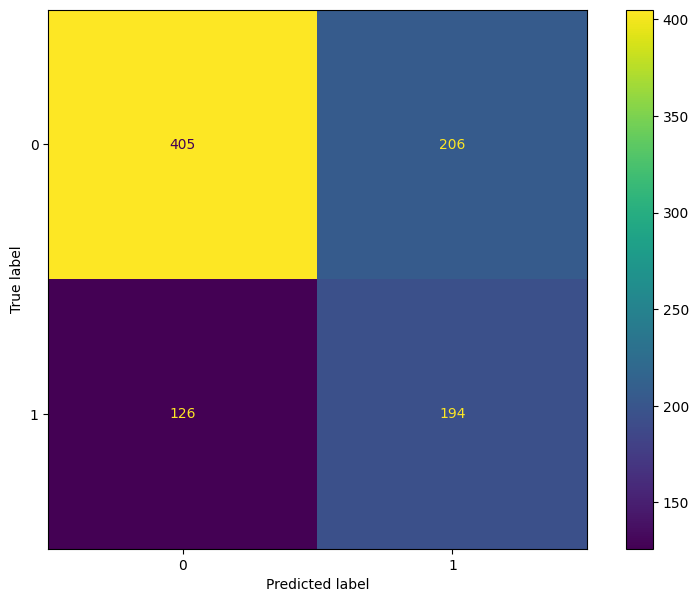

In [100]:
#Model Evaluation Confussion Matrix Test-Set Logistic Regression
cm_test_log = confusion_matrix(y_test, y_test_pred_log)
ConfusionMatrixDisplay(cm_test_log).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Logistic Regression cenderung memprediksi ke kelas *leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class no leave* sejumlah 206 kesalahan, kesalahan tersebut di-prediksi sebagai *class leave*. Sedangkan prediksi *class leave* terdapat 126 kesalahan. Kesalahan ini diprediksi sebagai kelas *no leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [101]:
# Pembuatan DF Act vs Pred Logistic Regression
act_pred_logreg = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_log
})
false_logreg = pd.concat([X_test, act_pred_logreg],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [102]:
#Karakteristik True Positif
false_logreg[(false_logreg['actual']==1) &(false_logreg['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,194,194.000000,194,194.000000,194.000000,194,194,194.000000,194.0,194.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,150,NaN,124,NaN,NaN,149,158,NaN,NaN,NaN
mean,NaN,2015.871134,NaN,2.386598,28.757732,NaN,NaN,2.912371,1.0,1.0
std,NaN,1.644237,NaN,0.593598,4.461472,NaN,NaN,1.463742,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2016.000000,NaN,2.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2017.000000,NaN,3.000000,31.000000,NaN,NaN,4.000000,1.0,1.0


In [103]:
#Karakteristik False Positif
false_logreg[(false_logreg['actual']==0) &(false_logreg['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,206,206.000000,206,206.000000,206.000000,206,206,206.000000,206.0,206.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,120,NaN,72,NaN,NaN,127,180,NaN,NaN,NaN
mean,NaN,2016.140777,NaN,2.417476,29.063107,NaN,NaN,2.757282,0.0,1.0
std,NaN,1.162247,NaN,0.691753,4.451462,NaN,NaN,1.437925,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,0.0,1.0
50%,NaN,2017.000000,NaN,3.000000,28.000000,NaN,NaN,2.500000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,31.000000,NaN,NaN,4.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *Logistic Regression* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2
- Karyawan yang bergabung tahun 2016
- Karyawan Wanita yang bekerja di Pune dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [104]:
#Karakteristik True Negatif
false_logreg[(false_logreg['actual']==0) &(false_logreg['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,405,405.000000,405,405.000000,405.000000,405,405,405.000000,405.0,405.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,377,NaN,249,NaN,NaN,326,373,NaN,NaN,NaN
mean,NaN,2014.274074,NaN,2.928395,29.446914,NaN,NaN,3.019753,0.0,0.0
std,NaN,1.663958,NaN,0.310395,4.694664,NaN,NaN,1.550983,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2015.000000,NaN,3.000000,33.000000,NaN,NaN,4.000000,0.0,0.0


In [105]:
#Karakteristik False Negatif
false_logreg[(false_logreg['actual']==1) &(false_logreg['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,126,126.000000,126,126.000000,126.000000,126,126,126.000000,126.0,126.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,99,NaN,87,NaN,NaN,99,119,NaN,NaN,NaN
mean,NaN,2014.722222,NaN,2.849206,29.706349,NaN,NaN,2.809524,1.0,0.0
std,NaN,2.211385,NaN,0.401347,4.899090,NaN,NaN,1.451699,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,1.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2017.000000,NaN,3.000000,33.000000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *Logistic Regression* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29-30 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014-2015
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [106]:
# Model Evaluation - Train Set Logistic Regression
print(classification_report(y_train_balanced, y_train_pred_log))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      2442
           1       0.69      0.64      0.66      2442

    accuracy                           0.67      4884
   macro avg       0.67      0.67      0.67      4884
weighted avg       0.67      0.67      0.67      4884



F1-Score **Model Logistic Regression** untuk kelas *leave* adalah **0.66** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [107]:
# Model Evaluation - Train Set KFold Logistic Regression
scores_log=cross_val_score(pipeline_logreg,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  Logistic Regression : ', scores_log)
print('F1-Score - Mean - Cross Validation Logistic Regression : ', scores_log.mean())
print('F1-Score - Std - Cross Validation Logistic Regression : ', scores_log.std())
print('F1-Score - Range of Train-Set Logistic Regression : ', (scores_log.mean()-scores_log.std()) , '-', (scores_log.mean()+scores_log.std()))

F1-Score - All - Cross Validation  Logistic Regression :  [0.6645768  0.66666667 0.66526316 0.62068966 0.67221644]
F1-Score - Mean - Cross Validation Logistic Regression :  0.657882544689746
F1-Score - Std - Cross Validation Logistic Regression :  0.018789459587439876
F1-Score - Range of Train-Set Logistic Regression :  0.6390930851023062 - 0.6766720042771859


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model Logistic Regression** memiliki **rata-rata** nilai `F1-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.65**. Yang artinya model tersebut tidak dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.01**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.63-0.67** 



In [108]:
# Model Evaluation - Test Set Logistic Regression
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       611
           1       0.48      0.61      0.54       320

    accuracy                           0.64       931
   macro avg       0.62      0.63      0.62       931
weighted avg       0.67      0.64      0.65       931



In [109]:
#Perhitungan ROC-AUC Test Logistic Regression
y_pred_proba_log = pipeline_logreg.predict_proba(X_test)[:, 1]
auc_log = roc_auc_score(y_test, y_pred_proba_log)
auc_log

0.6912898936170212

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* sangat rendah. Untuk *train* di angka 0.65 sedangkan untuk *test* di angka 0.54. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC* (0.69) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **64%** (tidak dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 76%(405 *employee*) yg benar, 24%(126 *employee*) salah prediksi. 24%(126 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 48%(194 *employee*) yg benar, 52%(206 *employee*) salah prediksi. 52%(206 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 66%(405 *employee*) yg diprediksi benar. 34%(206 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 61%(194 *employee*) yg diprediksi benar. 39%(126 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model Logistic Regression** tidak dapat melakukan prediksi yang tepat pada kelas *leave* (hasil prediksi banyak FN dan FP nya)

## 8.2 Evaluasi Baseline Model Support Vector Machine

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *leave* atau kelas *no leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

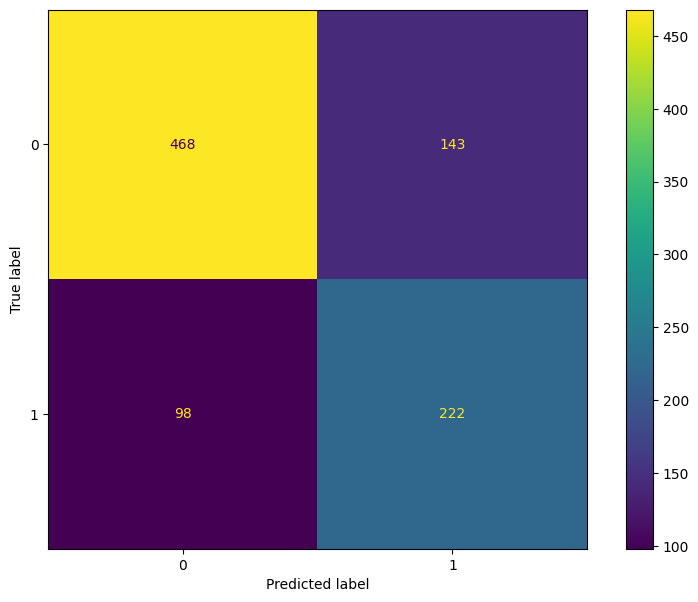

In [110]:
#Model Evaluation Confussion Matrix Test-Set SVM
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
ConfusionMatrixDisplay(cm_test_svm).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model SVM cenderung memprediksi ke kelas *leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *no class leave* sejumlah 143 kesalahan, kesalahan tersebut di-prediksi sebagai *class leave*. Sedangkan prediksi *class leave* terdapat 98 kesalahan. Kesalahan ini diprediksi sebagai kelas *no leave*

Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [111]:
# Pembuatan DF Act vs Pred SVM
act_pred_svm = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_svm
})
false_svm = pd.concat([X_test, act_pred_svm],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [112]:
#Karakteristik True Positif
false_svm[(false_svm['actual']==1) &(false_svm['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,222,222.000000,222,222.000000,222.000000,222,222,222.000000,222.0,222.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,163,NaN,119,NaN,NaN,140,188,NaN,NaN,NaN
mean,NaN,2015.824324,NaN,2.459459,28.945946,NaN,NaN,2.878378,1.0,1.0
std,NaN,1.859485,NaN,0.567343,4.655241,NaN,NaN,1.439137,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2016.000000,NaN,2.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [113]:
#Karakteristik False Positif
false_svm[(false_svm['actual']==0) &(false_svm['prediction']==1)].describe(include='all')


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,143,143.000000,143,143.000000,143.000000,143,143,143.000000,143.0,143.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Masters,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,72,NaN,57,NaN,NaN,89,133,NaN,NaN,NaN
mean,NaN,2016.216783,NaN,2.587413,29.111888,NaN,NaN,2.874126,0.0,1.0
std,NaN,1.468639,NaN,0.573213,4.318491,NaN,NaN,1.413552,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2016.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,0.0,1.0
50%,NaN,2017.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,31.000000,NaN,NaN,4.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *Support Vector Machine* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2016
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Masters
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [114]:
#Karakteristik True Negatif
false_svm[(false_svm['actual']==0) &(false_svm['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,468,468.000000,468,468.000000,468.000000,468,468,468.000000,468.0,468.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,427,NaN,257,NaN,NaN,316,420,NaN,NaN,NaN
mean,NaN,2014.502137,NaN,2.807692,29.380342,NaN,NaN,2.948718,0.0,0.0
std,NaN,1.631461,NaN,0.508372,4.703249,NaN,NaN,1.549172,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2016.000000,NaN,3.000000,32.250000,NaN,NaN,4.000000,0.0,0.0


In [115]:
#Karakteristik False Negatif
false_svm[(false_svm['actual']==1) &(false_svm['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,98,98.000000,98,98.000000,98.000000,98,98,98.000000,98.0,98.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,86,NaN,64,NaN,NaN,62,89,NaN,NaN,NaN
mean,NaN,2014.500000,NaN,2.816327,29.551020,NaN,NaN,2.857143,1.0,0.0
std,NaN,1.900895,NaN,0.504555,4.648739,NaN,NaN,1.506002,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,1.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,33.000000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *Support Vector Machine* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29-30 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014-2015
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [116]:
# Model Evaluation - Train Set SVM
print(classification_report(y_train_balanced, y_train_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2442
           1       0.78      0.77      0.77      2442

    accuracy                           0.78      4884
   macro avg       0.78      0.78      0.78      4884
weighted avg       0.78      0.78      0.78      4884



F1-Score **Model Support Vector Machine** untuk kelas *leave* adalah **0.77** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [117]:
# Model Evaluation - Train Set KFold SVM
scores_svm=cross_val_score(pipeline_svm,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  SVM : ', scores_svm)
print('F1-Score - Mean - Cross Validation SVM : ', scores_svm.mean())
print('F1-Score - Std - Cross Validation SVM : ', scores_svm.std())
print('F1-Score - Range of Train-Set SVM : ', (scores_svm.mean()-scores_svm.std()) , '-', (scores_svm.mean()+scores_svm.std()))

F1-Score - All - Cross Validation  SVM :  [0.73572939 0.76098607 0.78661088 0.77125506 0.77846791]
F1-Score - Mean - Cross Validation SVM :  0.7666098603274014
F1-Score - Std - Cross Validation SVM :  0.017592399690208177
F1-Score - Range of Train-Set SVM :  0.7490174606371932 - 0.7842022600176096


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model SVM** memiliki **rata-rata** nilai `F1-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.76**. Yang artinya model tersebut tidak dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.01**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.74-0.78** 



In [118]:
# Model Evaluation - Test Set SVM
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       611
           1       0.61      0.69      0.65       320

    accuracy                           0.74       931
   macro avg       0.72      0.73      0.72       931
weighted avg       0.75      0.74      0.74       931



In [119]:
#Perhitungan ROC-AUC Test SVM
y_pred_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
auc_svm

0.8039177577741408

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* sangat rendah. Untuk *train* di angka 0.76 sedangkan untuk *test* di angka 0.77. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC* (0.80) dapat disimpulkan bahwa **model tidak terlalu dipengaruhi *treshold***
- Model memiliki akurasi **74%** (tidak dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 83%(468 *employee*) yg benar, 17%(98 *employee*) salah prediksi. 17%(98 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 61%(222 *employee*) yg benar, 39%(143 *employee*) salah prediksi. 39%(143 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 77%(468 *employee*) yg diprediksi benar. 23%(143 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 69%(222 *employee*) yg diprediksi benar. 31%(98 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model SVM** tidak dapat melakukan prediksi yang tepat pada kelas *leave* (hasil prediksi banyak FN dan FP nya)

## 8.3 Evaluasi Baseline Model Decision Tree

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

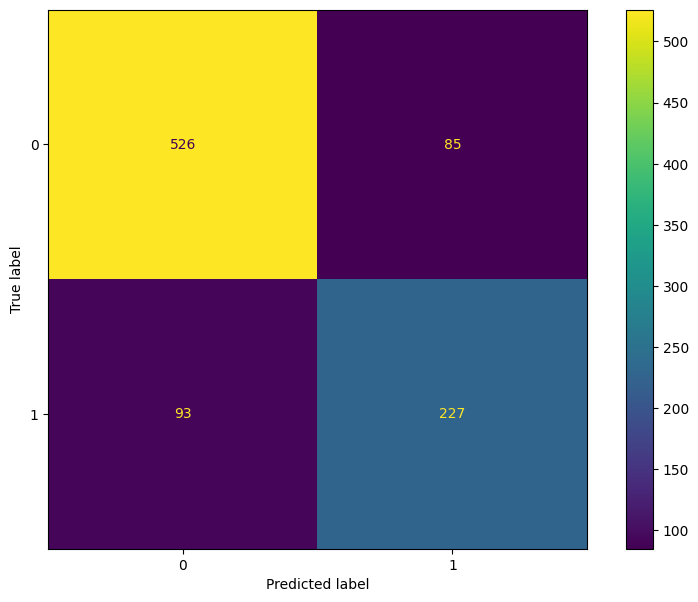

In [120]:
#Model Evaluation Confussion Matrix Test-Set Decision Tree
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
ConfusionMatrixDisplay(cm_test_tree).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Decision Tree cenderung memprediksi ke kelas *no leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class leave* sejumlah 93 kesalahan, kesalahan tersebut di-prediksi sebagai *class no leave*. Sedangkan prediksi *class no leave* terdapat 85 kesalahan. Kesalahan ini diprediksi sebagai kelas *leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [121]:
# Pembuatan DF Act vs Pred Decision Tree
act_pred_tree = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_tree
})
false_tree = pd.concat([X_test, act_pred_tree],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [122]:
#Karakteristik True Positif
false_tree[(false_tree['actual']==1) &(false_tree['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,227,227.000000,227,227.000000,227.000000,227,227,227.000000,227.0,227.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,174,NaN,122,NaN,NaN,141,193,NaN,NaN,NaN
mean,NaN,2015.784141,NaN,2.484581,29.092511,NaN,NaN,2.925110,1.0,1.0
std,NaN,1.935261,NaN,0.559298,4.731301,NaN,NaN,1.481041,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2014.500000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2015.000000,NaN,3.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [123]:
#Karakteristik False Positif
false_tree[(false_tree['actual']==0) &(false_tree['prediction']==1)].describe(include='all')


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,85,85.000000,85,85.000000,85.000000,85,85,85.000000,85.0,85.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,New Delhi,NaN,NaN,Female,No,NaN,NaN,NaN
freq,49,NaN,31,NaN,NaN,45,77,NaN,NaN,NaN
mean,NaN,2015.317647,NaN,2.541176,30.623529,NaN,NaN,2.658824,0.0,1.0
std,NaN,1.872176,NaN,0.646473,5.275678,NaN,NaN,1.592788,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2014.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,0.0,1.0
50%,NaN,2016.000000,NaN,3.000000,30.000000,NaN,NaN,3.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,35.000000,NaN,NaN,4.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *Decision Tree* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 30-31 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2015
- Karyawan Wanita yang bekerja di New Delhi dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [124]:
#Karakteristik True Negatif
false_tree[(false_tree['actual']==0) &(false_tree['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,526,526.000000,526,526.000000,526.000000,526,526,526.000000,526.0,526.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,448,NaN,285,NaN,NaN,365,476,NaN,NaN,NaN
mean,NaN,2014.836502,NaN,2.790875,29.106464,NaN,NaN,2.975285,0.0,0.0
std,NaN,1.723750,NaN,0.503315,4.467883,NaN,NaN,1.502175,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2017.000000,NaN,3.000000,31.000000,NaN,NaN,4.000000,0.0,0.0


In [125]:
#Karakteristik False Negatif
false_tree[(false_tree['actual']==1) &(false_tree['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,93,93.000000,93,93.000000,93.000000,93,93,93.000000,93.0,93.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,75,NaN,63,NaN,NaN,58,84,NaN,NaN,NaN
mean,NaN,2014.526882,NaN,2.774194,29.225806,NaN,NaN,2.741935,1.0,0.0
std,NaN,1.754444,NaN,0.554214,4.484585,NaN,NaN,1.398005,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,1.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *Decision Tree* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014-2015
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [126]:
# Model Evaluation - Train Set Decision Tree
print(classification_report(y_train_balanced, y_train_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2442
           1       0.97      0.90      0.94      2442

    accuracy                           0.94      4884
   macro avg       0.94      0.94      0.94      4884
weighted avg       0.94      0.94      0.94      4884



F1-Score **Model Decision Tree** untuk kelas *leave* adalah **0.94** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [127]:
# Model Evaluation - Train Set KFold Decision Tree
scores_tree=cross_val_score(pipeline_tree,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  Decision Tree : ', scores_tree)
print('F1-Score - Mean - Cross Validation Decision Tree : ', scores_tree.mean())
print('F1-Score - Std - Cross Validation Decision Tree : ', scores_tree.std())
print('F1-Score - Range of Train-Set Decision Tree : ', (scores_tree.mean()-scores_tree.std()) , '-', (scores_tree.mean()+scores_tree.std()))

F1-Score - All - Cross Validation  Decision Tree :  [0.77582418 0.78619154 0.84199134 0.85132383 0.86503067]
F1-Score - Mean - Cross Validation Decision Tree :  0.8240723116662088
F1-Score - Std - Cross Validation Decision Tree :  0.03606704888256595
F1-Score - Range of Train-Set Decision Tree :  0.7880052627836428 - 0.8601393605487747


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model Decision Tree** memiliki **rata-rata** nilai `F1-Score` yang  jauh dari hasil *classification report train-set* yaitu **0.82**. Yang artinya model tersebut dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.03**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.78-0.86** 



In [128]:
# Model Evaluation - Test Set Decision Tree
print(classification_report(y_test, y_test_pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       611
           1       0.73      0.71      0.72       320

    accuracy                           0.81       931
   macro avg       0.79      0.79      0.79       931
weighted avg       0.81      0.81      0.81       931



In [129]:
#Perhitungan ROC-AUC Test Decision Tree
y_pred_proba_tree = pipeline_tree.predict_proba(X_test)[:, 1]
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
auc_tree

0.7898782733224223

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* memiliki selisih yang jauh. Untuk *train* di angka 0.82 sedangkan untuk *test* di angka 0.72. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC* (0.78) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **81%** (Dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 85%(526 *employee*) yg benar, 15%(93 *employee*) salah prediksi. 15%(93 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 73%(227 *employee*) yg benar, 27%(85 *employee*) salah prediksi. 27%(85 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 86%(526 *employee*) yg diprediksi benar. 14%(85 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 71%(227 *employee*) yg diprediksi benar. 29%(93 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model Decision tree** dapat melakukan prediksi yang tepat pada kelas *leave* (lebih baik dari pada svm dan logistic regression)

## 8.4 Evaluasi Baseline Model KNN

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

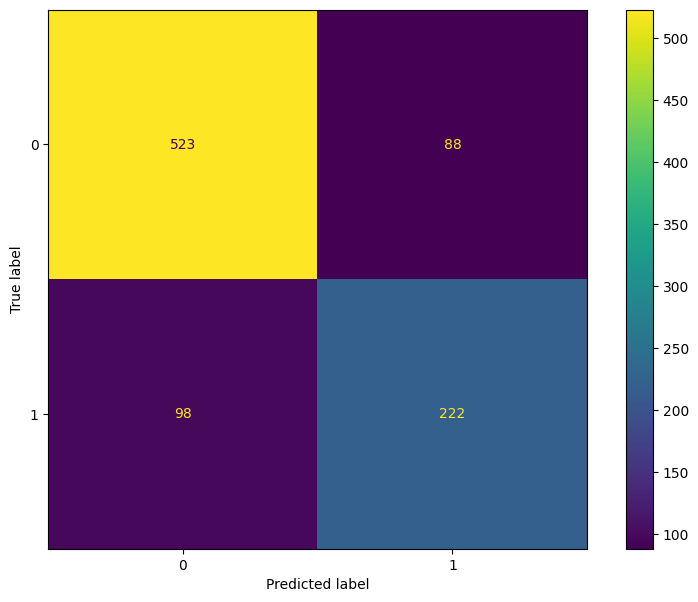

In [130]:
#Model Evaluation Confussion Matrix Test-Set KNN
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
ConfusionMatrixDisplay(cm_test_knn).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model KNN cenderung memprediksi ke kelas *no leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class leave* sejumlah 98 kesalahan, kesalahan tersebut di-prediksi sebagai *class no leave*. Sedangkan prediksi *class no leave* terdapat 88 kesalahan. Kesalahan ini diprediksi sebagai kelas *leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [131]:
# Pembuatan DF Act vs Pred KNN
act_pred_knn = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_knn
})
false_knn = pd.concat([X_test, act_pred_knn],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [132]:
#Karakteristik True Positif
false_knn[(false_knn['actual']==1) &(false_knn['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,222,222.000000,222,222.000000,222.000000,222,222,222.000000,222.0,222.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,175,NaN,118,NaN,NaN,144,189,NaN,NaN,NaN
mean,NaN,2015.756757,NaN,2.486486,28.972973,NaN,NaN,2.932432,1.0,1.0
std,NaN,1.908382,NaN,0.576538,4.587923,NaN,NaN,1.464491,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2015.000000,NaN,3.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [133]:
#Karakteristik False Positif
false_knn[(false_knn['actual']==0) &(false_knn['prediction']==1)].describe(include='all')


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,88,88.000000,88,88.000000,88.000000,88,88,88.000000,88.0,88.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Female,No,NaN,NaN,NaN
freq,48,NaN,39,NaN,NaN,47,77,NaN,NaN,NaN
mean,NaN,2015.352273,NaN,2.613636,30.181818,NaN,NaN,2.443182,0.0,1.0
std,NaN,1.813359,NaN,0.685344,5.084449,NaN,NaN,1.476700,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2014.000000,NaN,2.000000,25.750000,NaN,NaN,1.000000,0.0,1.0
50%,NaN,2016.000000,NaN,3.000000,29.000000,NaN,NaN,2.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,34.250000,NaN,NaN,3.250000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *KNN* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2 tahun
- Karyawan yang memiliki umur rata-rata 30 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2015
- Karyawan Wanita yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [134]:
#Karakteristik True Negatif
false_knn[(false_knn['actual']==0) &(false_knn['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,523,523.000000,523,523.000000,523.000000,523,523,523.000000,523.0,523.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,449,NaN,275,NaN,NaN,364,476,NaN,NaN,NaN
mean,NaN,2014.827916,NaN,2.780115,29.172084,NaN,NaN,3.013384,0.0,0.0
std,NaN,1.731228,NaN,0.498490,4.519119,NaN,NaN,1.510440,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2017.000000,NaN,3.000000,31.000000,NaN,NaN,4.000000,0.0,0.0


In [135]:
#Karakteristik False Negatif
false_knn[(false_knn['actual']==1) &(false_knn['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,98,98.000000,98,98.000000,98.000000,98,98,98.000000,98.0,98.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,74,NaN,60,NaN,NaN,66,88,NaN,NaN,NaN
mean,NaN,2014.653061,NaN,2.755102,29.489796,NaN,NaN,2.734694,1.0,0.0
std,NaN,1.889210,NaN,0.518945,4.806020,NaN,NaN,1.439867,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,1.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,32.750000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *KNN* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014-2015
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [136]:
# Model Evaluation - Train Set KNN
print(classification_report(y_train_balanced, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2442
           1       0.89      0.83      0.86      2442

    accuracy                           0.87      4884
   macro avg       0.87      0.87      0.87      4884
weighted avg       0.87      0.87      0.87      4884



F1-Score **Model Decision Tree** untuk kelas *leave* adalah **0.86** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [137]:
# Model Evaluation - Train Set KFold KNN
scores_knn=cross_val_score(pipeline_knn,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  KNN : ', scores_knn)
print('F1-Score - Mean - Cross Validation KNN : ', scores_knn.mean())
print('F1-Score - Std - Cross Validation KNN : ', scores_knn.std())
print('F1-Score - Range of Train-Set KNN : ', (scores_knn.mean()-scores_knn.std()) , '-', (scores_knn.mean()+scores_knn.std()))

F1-Score - All - Cross Validation  KNN :  [0.76791444 0.78571429 0.81789137 0.82376636 0.82906858]
F1-Score - Mean - Cross Validation KNN :  0.8048710079696239
F1-Score - Std - Cross Validation KNN :  0.023853112256114667
F1-Score - Range of Train-Set KNN :  0.7810178957135092 - 0.8287241202257385


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model KNN** memiliki **rata-rata** nilai `F1-Score` yang  jauh dari hasil *classification report train-set* yaitu **0.80**. Yang artinya model tersebut dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.02**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.78-0.82** 



In [138]:
# Model Evaluation - Test Set Decision KNN
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       611
           1       0.72      0.69      0.70       320

    accuracy                           0.80       931
   macro avg       0.78      0.77      0.78       931
weighted avg       0.80      0.80      0.80       931



In [139]:
#Perhitungan ROC-AUC Test KNN
y_pred_proba_knn = pipeline_knn.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
auc_knn

0.8256930237315876

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* memiliki selisih yang jauh. Untuk *train* di angka 0.80 sedangkan untuk *test* di angka 0.70. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC* (0.82) dapat disimpulkan bahwa **model tidak dipengaruhi signifikan oleh *treshold***
- Model memiliki akurasi **80%** (Dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 84%(523 *employee*) yg benar, 16%(98 *employee*) salah prediksi. 16%(98 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 72%(222 *employee*) yg benar, 28%(88 *employee*) salah prediksi. 28%(88 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 86%(523 *employee*) yg diprediksi benar. 14%(88 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 69%(222 *employee*) yg diprediksi benar. 29%(98 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model KNN** tidak dapat melakukan prediksi yang tepat pada kelas *leave* (hasil prediksi banyak FN dan FP nya)

## 8.5 Evaluasi Baseline Model Random Forest

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

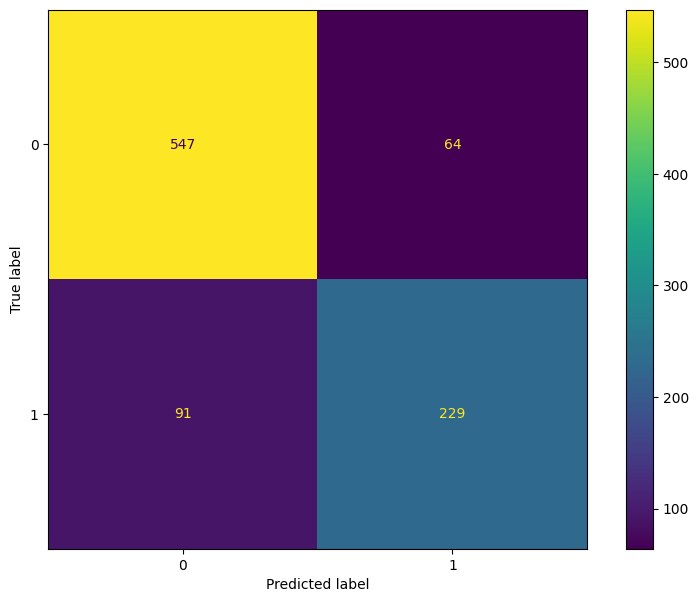

In [140]:
#Model Evaluation Confussion Matrix Test-Set Random Forest
cm_test_forest = confusion_matrix(y_test, y_test_pred_forest)
ConfusionMatrixDisplay(cm_test_forest).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Random Forest cenderung memprediksi ke kelas *no leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class leave* sejumlah 91 kesalahan, kesalahan tersebut di-prediksi sebagai *class no leave*. Sedangkan prediksi *class no leave* terdapat 64 kesalahan. Kesalahan ini diprediksi sebagai kelas *leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [141]:
# Pembuatan DF Act vs Pred Random Forest
act_pred_forest = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_forest
})
false_forest = pd.concat([X_test, act_pred_forest],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [142]:
#Karakteristik True Positif
false_forest[(false_forest['actual']==1) &(false_forest['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,229,229.000000,229,229.000000,229.000000,229,229,229.000000,229.0,229.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,176,NaN,123,NaN,NaN,145,194,NaN,NaN,NaN
mean,NaN,2015.807860,NaN,2.471616,29.052402,NaN,NaN,2.930131,1.0,1.0
std,NaN,1.925756,NaN,0.573790,4.693861,NaN,NaN,1.488084,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2016.000000,NaN,3.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [143]:
#Karakteristik False Positif
false_forest[(false_forest['actual']==0) &(false_forest['prediction']==1)].describe(include='all')


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,64,64.000000,64,64.000000,64.000000,64,64,64.000000,64.0,64.0
unique,2,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Masters,NaN,New Delhi,NaN,NaN,Male,No,NaN,NaN,NaN
freq,33,NaN,24,NaN,NaN,34,61,NaN,NaN,NaN
mean,NaN,2015.375000,NaN,2.453125,28.484375,NaN,NaN,2.359375,0.0,1.0
std,NaN,1.838737,NaN,0.688446,4.833718,NaN,NaN,1.451515,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2014.000000,NaN,2.000000,25.000000,NaN,NaN,1.000000,0.0,1.0
50%,NaN,2016.000000,NaN,3.000000,27.000000,NaN,NaN,2.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,30.250000,NaN,NaN,3.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *Random Forest* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2 tahun
- Karyawan yang memiliki umur rata-rata 28 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2
- Karyawan yang bergabung tahun 2015
- Karyawan Pria yang bekerja di New Delhi dan memiliki tingkat pendidikan Masters
- Karyawan yang tidak terlibat *project* > 1 bulan




Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [144]:
#Karakteristik True Negatif
false_forest[(false_forest['actual']==0) &(false_forest['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,547,547.000000,547,547.000000,547.000000,547,547,547.000000,547.0,547.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,466,NaN,295,NaN,NaN,371,492,NaN,NaN,NaN
mean,NaN,2014.848263,NaN,2.791590,29.414991,NaN,NaN,2.998172,0.0,0.0
std,NaN,1.734379,NaN,0.499526,4.582335,NaN,NaN,1.512462,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2017.000000,NaN,3.000000,32.500000,NaN,NaN,4.000000,0.0,0.0


In [145]:
#Karakteristik False Negatif
false_forest[(false_forest['actual']==1) &(false_forest['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,91,91.000000,91,91.000000,91.00000,91,91,91.000000,91.0,91.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,73,NaN,63,NaN,NaN,60,83,NaN,NaN,NaN
mean,NaN,2014.439560,NaN,2.813187,29.32967,NaN,NaN,2.725275,1.0,0.0
std,NaN,1.720522,NaN,0.492434,4.57300,NaN,NaN,1.374901,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.00000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.00000,NaN,NaN,2.000000,1.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.00000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,32.00000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *Random Forest* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [146]:
# Model Evaluation - Train Set Random Forest
print(classification_report(y_train_balanced, y_train_pred_forest))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2442
           1       0.96      0.91      0.94      2442

    accuracy                           0.94      4884
   macro avg       0.94      0.94      0.94      4884
weighted avg       0.94      0.94      0.94      4884



F1-Score **Model Random Forest** untuk kelas *leave* adalah **0.94** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [147]:
# Model Evaluation - Train Set KFold Random Forest
scores_forest=cross_val_score(pipeline_forest,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  Random Forest : ', scores_forest)
print('F1-Score - Mean - Cross Validation Random Forest : ', scores_forest.mean())
print('F1-Score - Std - Cross Validation Random Forest : ', scores_forest.std())
print('F1-Score - Range of Train-Set Random Forest : ', (scores_forest.mean()-scores_forest.std()) , '-', (scores_forest.mean()+scores_forest.std()))

F1-Score - All - Cross Validation  Random Forest :  [0.78135405 0.79821628 0.84978541 0.87461774 0.87153135]
F1-Score - Mean - Cross Validation Random Forest :  0.83510096372228
F1-Score - Std - Cross Validation Random Forest :  0.03834994607353533
F1-Score - Range of Train-Set Random Forest :  0.7967510176487447 - 0.8734509097958154


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model Random Forest** memiliki **rata-rata** nilai `F1-Score` yang jauh dari hasil *classification report train-set* yaitu **0.83**. Yang artinya model tersebut dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.03**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil stratifikasi 5 Split-5 Fold memiliki **range** **0.79-0.87** 



In [148]:
# Model Evaluation - Test Set Random Forest
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       611
           1       0.78      0.72      0.75       320

    accuracy                           0.83       931
   macro avg       0.82      0.81      0.81       931
weighted avg       0.83      0.83      0.83       931



In [149]:
#Perhitungan ROC-AUC Test Random Forest
y_pred_proba_forest = pipeline_forest.predict_proba(X_test)[:, 1]
auc_forest = roc_auc_score(y_test, y_pred_proba_forest)
auc_forest

0.8559814852700491

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* memiliki selisih yang jauh. Untuk *train* di angka 0.83 sedangkan untuk *test* di angka 0.75. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC* (0.85) dapat disimpulkan bahwa **model tidak dipengaruhi signifikan oleh *treshold***
- Model memiliki akurasi **83%** (dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 86%(547 *employee*) yg benar, 14%(91 *employee*) salah prediksi. 14%(91 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 78%(229 *employee*) yg benar, 22%(64 *employee*) salah prediksi. 22%(64 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 90%(547 *employee*) yg diprediksi benar. 10%(64 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 72%(229 *employee*) yg diprediksi benar. 28%(91 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model Random Forest** dapat melakukan prediksi yang tepat pada kelas *leave* (lebih baik dari pada logistic regression, svm dan decision tree)

## 8.6 Evaluasi Baseline Model XGBoost

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

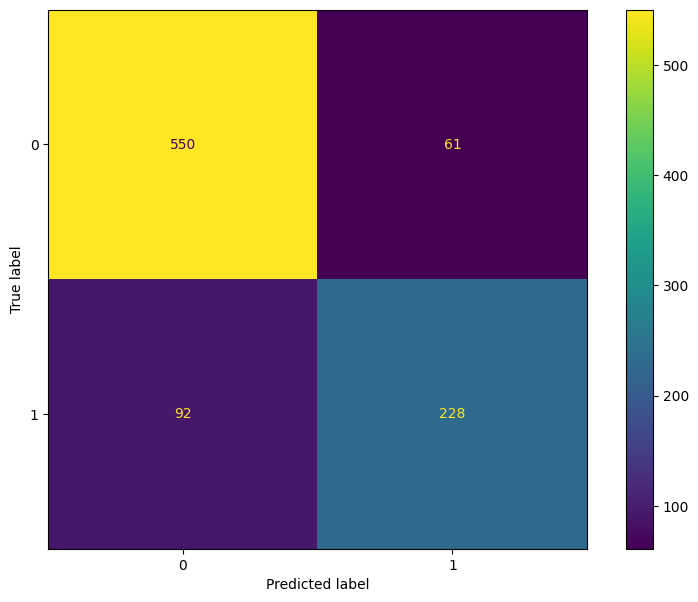

In [150]:
#Model Evaluation Confussion Matrix Test-Set XGBoost
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
ConfusionMatrixDisplay(cm_test_xgb).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model XGBoost cenderung memprediksi ke kelas *no leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class leave* sejumlah 92 kesalahan, kesalahan tersebut di-prediksi sebagai *class no leave*. Sedangkan prediksi *class no leave* terdapat 61 kesalahan. Kesalahan ini diprediksi sebagai kelas *leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [151]:
# Pembuatan DF Act vs Pred XGBoost
act_pred_xgb = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_xgb
})
false_xgb = pd.concat([X_test, act_pred_xgb],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [152]:
#Karakteristik True Positif
false_xgb[(false_xgb['actual']==1) &(false_xgb['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,228,228.000000,228,228.000000,228.000000,228,228,228.000000,228.0,228.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,172,NaN,123,NaN,NaN,142,192,NaN,NaN,NaN
mean,NaN,2015.842105,NaN,2.464912,29.149123,NaN,NaN,2.942982,1.0,1.0
std,NaN,1.903296,NaN,0.573725,4.754284,NaN,NaN,1.457562,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2016.000000,NaN,3.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [153]:
#Karakteristik False Positif
false_xgb[(false_xgb['actual']==0) &(false_xgb['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,61,61.000000,61,61.000000,61.000000,61,61,61.000000,61.0,61.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Masters,NaN,New Delhi,NaN,NaN,Female,No,NaN,NaN,NaN
freq,40,NaN,30,NaN,NaN,33,58,NaN,NaN,NaN
mean,NaN,2015.737705,NaN,2.426230,28.032787,NaN,NaN,2.606557,0.0,1.0
std,NaN,1.701976,NaN,0.694239,4.683187,NaN,NaN,1.562889,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2015.000000,NaN,2.000000,25.000000,NaN,NaN,2.000000,0.0,1.0
50%,NaN,2017.000000,NaN,3.000000,26.000000,NaN,NaN,3.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,30.000000,NaN,NaN,4.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *XGBoost* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 28 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2
- Karyawan yang bergabung tahun 2015-2016
- Karyawan Wanita yang bekerja di New Delhi dan memiliki tingkat pendidikan Masters
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [154]:
#Karakteristik True Negatif
false_xgb[(false_xgb['actual']==0) &(false_xgb['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,550,550.000000,550,550.000000,550.000000,550,550,550.000000,550.0,550.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,477,NaN,300,NaN,NaN,377,495,NaN,NaN,NaN
mean,NaN,2014.810909,NaN,2.792727,29.460000,NaN,NaN,2.967273,0.0,0.0
std,NaN,1.733803,NaN,0.498396,4.588459,NaN,NaN,1.509780,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2017.000000,NaN,3.000000,33.000000,NaN,NaN,4.000000,0.0,0.0


In [155]:
#Karakteristik False Negatif
false_xgb[(false_xgb['actual']==1) &(false_xgb['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,92,92.000000,92,92.000000,92.000000,92,92,92.000000,92.0,92.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,77,NaN,66,NaN,NaN,58,85,NaN,NaN,NaN
mean,NaN,2014.369565,NaN,2.826087,29.086957,NaN,NaN,2.695652,1.0,0.0
std,NaN,1.720704,NaN,0.482865,4.421854,NaN,NaN,1.450571,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,1.750000,1.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,31.250000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *XGBoost* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [156]:
# Model Evaluation - Train Set XGBoost
print(classification_report(y_train_balanced, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2442
           1       0.96      0.87      0.91      2442

    accuracy                           0.92      4884
   macro avg       0.92      0.92      0.92      4884
weighted avg       0.92      0.92      0.92      4884



F1-Score **Model XGBoost** untuk kelas *leave* adalah **0.91** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [157]:
# Model Evaluation - Train Set KFold XGBoost
scores_xgb=cross_val_score(pipeline_xgb,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  XGBoost : ', scores_xgb)
print('F1-Score - Mean - Cross Validation XGBoost : ', scores_xgb.mean())
print('F1-Score - Std - Cross Validation XGBoost : ', scores_xgb.std())
print('F1-Score - Range of Train-Set XGBoost : ', (scores_xgb.mean()-scores_xgb.std()) , '-', (scores_xgb.mean()+scores_xgb.std()))

F1-Score - All - Cross Validation  XGBoost :  [0.7936146  0.78662053 0.85157096 0.91451292 0.92214358]
F1-Score - Mean - Cross Validation XGBoost :  0.8536925183722894
F1-Score - Std - Cross Validation XGBoost :  0.05744071499876838
F1-Score - Range of Train-Set XGBoost :  0.7962518033735211 - 0.9111332333710578


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model XGBoost** memiliki **rata-rata** nilai `F1-Score` yang jauh dari hasil *classification report train-set* yaitu **0.85**. Yang artinya model tersebut dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.05**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.79-0.91** 



In [158]:
# Model Evaluation - Test Set XGBoost
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       611
           1       0.79      0.71      0.75       320

    accuracy                           0.84       931
   macro avg       0.82      0.81      0.81       931
weighted avg       0.83      0.84      0.83       931



In [159]:
#Perhitungan ROC-AUC Test XGBoost
y_pred_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
auc_xgb

0.8666734860883797

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* memiliki selisih yang jauh. Untuk *train* di angka 0.85 sedangkan untuk *test* di angka 0.75. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC* (0.86) dapat disimpulkan bahwa **model tidak dipengaruhi signifikan oleh *treshold***
- Model memiliki akurasi **84%** (Dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 86%(550 *employee*) yg benar, 14%(92 *employee*) salah prediksi. 14%(92 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 79%(228 *employee*) yg benar, 21%(61 *employee*) salah prediksi. 21%(61 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 90%(550 *employee*) yg diprediksi benar. 10%(61 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 71%(228 *employee*) yg diprediksi benar. 29%(92 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model XGBoost** dapat melakukan prediksi yang tepat pada kelas *leave* (lebih baik dari pada model logistic regression, svm, decision tree dan random forest)

## 8.7 Evaluasi Baseline Model ADABoost

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

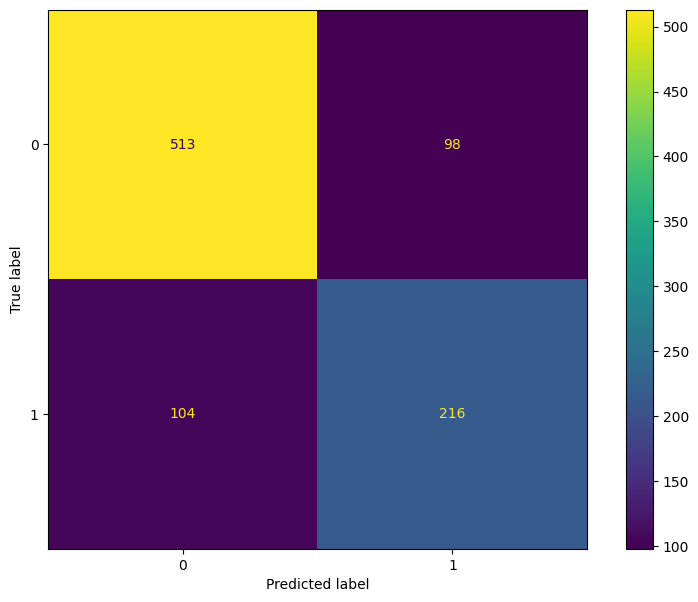

In [160]:
#Model Evaluation Confussion Matrix Test-Set ADABoost
cm_test_ada = confusion_matrix(y_test, y_test_pred_ada)
ConfusionMatrixDisplay(cm_test_ada).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model ADABoost cenderung memprediksi ke kelas *no leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class leave* sejumlah 104 kesalahan, kesalahan tersebut di-prediksi sebagai *class no leave*. Sedangkan prediksi *class no leave* terdapat 98 kesalahan. Kesalahan ini diprediksi sebagai kelas *leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [161]:
# Pembuatan DF Act vs Pred ADABoost
act_pred_ada = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_test_pred_ada
})
false_ada = pd.concat([X_test, act_pred_ada],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [162]:
#Karakteristik True Positif
false_ada[(false_ada['actual']==1) &(false_ada['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,216,216.000000,216,216.000000,216.000000,216,216,216.000000,216.0,216.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,166,NaN,116,NaN,NaN,139,184,NaN,NaN,NaN
mean,NaN,2015.907407,NaN,2.430556,29.055556,NaN,NaN,2.842593,1.0,1.0
std,NaN,1.902444,NaN,0.558063,4.630201,NaN,NaN,1.482688,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2016.000000,NaN,2.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [163]:
#Karakteristik False Positif
false_ada[(false_ada['actual']==0) &(false_ada['prediction']==1)].describe(include='all')


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,98,98.000000,98,98.000000,98.000000,98,98,98.000000,98.0,98.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Masters,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,52,NaN,41,NaN,NaN,70,94,NaN,NaN,NaN
mean,NaN,2015.612245,NaN,2.255102,28.459184,NaN,NaN,2.683673,0.0,1.0
std,NaN,1.641175,NaN,0.561868,3.888042,NaN,NaN,1.557138,0.0,0.0
min,NaN,2013.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2014.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,0.0,1.0
50%,NaN,2017.000000,NaN,2.000000,27.500000,NaN,NaN,3.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,30.000000,NaN,NaN,4.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *ADABoost* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 28 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2
- Karyawan yang bergabung tahun 2015-2016
- Karyawan Wanita yang bekerja di Pune dan memiliki tingkat pendidikan Masters
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [164]:
#Karakteristik True Negatif
false_ada[(false_ada['actual']==0) &(false_ada['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,513,513.000000,513,513.000000,513.000000,513,513,513.000000,513.0,513.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,452,NaN,291,NaN,NaN,377,459,NaN,NaN,NaN
mean,NaN,2014.768031,NaN,2.851852,29.481481,NaN,NaN,2.978558,0.0,0.0
std,NaN,1.740710,NaN,0.469251,4.725693,NaN,NaN,1.506992,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2016.000000,NaN,3.000000,33.000000,NaN,NaN,4.000000,0.0,0.0


In [165]:
#Karakteristik False Negatif
false_ada[(false_ada['actual']==1) &(false_ada['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,104,104.000000,104,104.000000,104.000000,104,104,104.000000,104.0,104.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,83,NaN,68,NaN,NaN,67,93,NaN,NaN,NaN
mean,NaN,2014.403846,NaN,2.855769,29.288462,NaN,NaN,2.932692,1.0,0.0
std,NaN,1.698196,NaN,0.491051,4.722746,NaN,NaN,1.409155,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,1.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *ADABoost* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian f1-score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [166]:
# Model Evaluation - Train Set ADABoost
print(classification_report(y_train_balanced, y_train_pred_ada))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      2442
           1       0.84      0.72      0.78      2442

    accuracy                           0.79      4884
   macro avg       0.80      0.79      0.79      4884
weighted avg       0.80      0.79      0.79      4884



F1-Score **Model ADABoost** untuk kelas *leave* adalah **0.78** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [167]:
# Model Evaluation - Train Set KFold ADABoost
scores_ada=cross_val_score(pipeline_ada,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  ADABoost : ', scores_ada)
print('F1-Score - Mean - Cross Validation ADABoost : ', scores_ada.mean())
print('F1-Score - Std - Cross Validation ADABoost : ', scores_ada.std())
print('F1-Score - Range of Train-Set ADABoost : ', (scores_ada.mean()-scores_ada.std()) , '-', (scores_ada.mean()+scores_ada.std()))

F1-Score - All - Cross Validation  ADABoost :  [0.72460497 0.752      0.77505568 0.78918919 0.79402348]
F1-Score - Mean - Cross Validation ADABoost :  0.76697466276107
F1-Score - Std - Cross Validation ADABoost :  0.025728809530339722
F1-Score - Range of Train-Set ADABoost :  0.7412458532307302 - 0.7927034722914097


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model ADABoost** memiliki **rata-rata** nilai `F1-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.76**. Yang artinya model tersebut tidak dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.02**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.74-0.79** 



In [168]:
# Model Evaluation - Test Set ADABoost
print(classification_report(y_test, y_test_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       611
           1       0.69      0.68      0.68       320

    accuracy                           0.78       931
   macro avg       0.76      0.76      0.76       931
weighted avg       0.78      0.78      0.78       931



In [169]:
#Perhitungan ROC-AUC Test ADABoost
y_pred_proba_ada = pipeline_ada.predict_proba(X_test)[:, 1]
auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
auc_ada

0.8050557487725041

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* sangat rendah. Untuk *train* di angka 0.76 sedangkan untuk *test* di angka 0.68. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC* (0.80) dapat disimpulkan bahwa **model tidak dipengaruhi signifikan oleh *treshold***
- Model memiliki akurasi **78%** (tidak dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 83%(513 *employee*) yg benar, 17%(104 *employee*) salah prediksi. 17%(104 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 69%(216 *employee*) yg benar, 31%(98 *employee*) salah prediksi. 31%(98 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 84%(513 *employee*) yg diprediksi benar. 16%(98 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 68%(216 *employee*) yg diprediksi benar. 32%(104 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model ADABoost** tidak dapat melakukan prediksi yang tepat pada kelas *leave* (hasil prediksi banyak FN dan FP nya)

## 8.8 Model Selection

Kemudian akan saya coba rekap perfomansi antar model agar dapat dibandingkan

In [170]:
#Pembuatan list kolom performansi semua model
eval_accu = [accuracy_score(y_test, y_test_pred_log),accuracy_score(y_test, y_test_pred_svm),accuracy_score(y_test, y_test_pred_tree),accuracy_score(y_test, y_test_pred_knn),accuracy_score(y_test, y_test_pred_forest),accuracy_score(y_test, y_test_pred_xgb),accuracy_score(y_test, y_test_pred_ada)]
eval_recall = [recall_score(y_test, y_test_pred_log),recall_score(y_test, y_test_pred_svm),recall_score(y_test, y_test_pred_tree),recall_score(y_test, y_test_pred_knn),recall_score(y_test, y_test_pred_forest),recall_score(y_test, y_test_pred_xgb),recall_score(y_test, y_test_pred_ada)]
eval_prec = [precision_score(y_test, y_test_pred_log),precision_score(y_test, y_test_pred_svm),precision_score(y_test, y_test_pred_tree),precision_score(y_test, y_test_pred_knn),precision_score(y_test, y_test_pred_forest),precision_score(y_test, y_test_pred_xgb),precision_score(y_test, y_test_pred_ada)]
eval_f1 = [f1_score(y_test, y_test_pred_log),f1_score(y_test, y_test_pred_svm),f1_score(y_test, y_test_pred_tree),f1_score(y_test, y_test_pred_knn),f1_score(y_test, y_test_pred_forest),f1_score(y_test, y_test_pred_xgb),f1_score(y_test, y_test_pred_ada)]
eval_auc =[auc_log, auc_svm, auc_tree,auc_knn, auc_forest, auc_xgb, auc_ada]
eval_kfold_mean = [scores_log.mean(), scores_svm.mean(), scores_tree.mean(),scores_knn.mean(), scores_forest.mean(), scores_xgb.mean(), scores_ada.mean()]

Selanjutnya adalah pembuatan *dataframe* performansi

In [171]:
#Membuat dataframe performansi
df_model_eval = pd.DataFrame([eval_accu, eval_f1, eval_recall,eval_prec ,eval_auc, eval_kfold_mean], index=['Accuracy','F1','Recall', 'Precision','AUC','KFold_F1'], columns=['Logistic_Regression','SVM','Decision_Tree', 'KNN','Random_Forest','XGBoost','ADABoost']).T

In [172]:
#Menampilkan dataframe performansi
df_model_eval = df_model_eval.round(decimals=2)
df_model_eval.sort_values(by='KFold_F1', ascending=False)

,Accuracy,F1,Recall,Precision,AUC,KFold_F1
XGBoost,0.84,0.75,0.71,0.79,0.87,0.85
Random_Forest,0.83,0.75,0.72,0.78,0.86,0.84
Decision_Tree,0.81,0.72,0.71,0.73,0.79,0.82
KNN,0.80,0.70,0.69,0.72,0.83,0.80
SVM,0.74,0.65,0.69,0.61,0.80,0.77
ADABoost,0.78,0.68,0.68,0.69,0.81,0.77
Logistic_Regression,0.64,0.54,0.61,0.48,0.69,0.66


Dari informasi diatas, **Model XGBoost** dipilih karena :

- **Berdasarkan model definition, saya akan memprioritaskan metric Strat-KFold, F1-Score dan ROC-AUC** (dengan prioritas utama Strat-KFold). Jika dilihat pada tabel diatas, **Model XGBoost memiliki Strat-KFold tertinggi**. Kemudian jika mengacu pada F1-Score, **Model XGBoost** memiliki **F1-Score tinggi**. Selain itu XGBoost juga memiliki **akurasi dan AUC Score yang paling tinggi** diantara model lain
- Secara bisnis, **Model XGBoost** dapat mengklasifikasikan kelas *leave* lebih baik dari pada model lainnya (meskipun masih ada beberapa kelemahan tapi model ini lebih baik dari model lainnya)

# 9 - Model Improvement for Selected Model (XGBoost Hyperparameter Tuning)

Model Improvement dilakukan pada **XGBoost**. *Section* ini dibagi menjadi 4 bagian yaitu *parameter tuning*, *fit-training*, evaluasi model, membandingkan evaluasi model sebelum tuning dan sesudah tuning

## 9.1 - Hyperparameter Tuning

XGBoost memiliki beberapa parameter yang dapat diatur. Parameter tersebut adalah :

- `eta` -> Learning rate
- `max_depth` -> Kedalaman pohon
- `alpha` -> L1 Regularization
- `lambda` -> L2 Regularization
- `n_estimators` -> Jumlah pohon
- `subsample` -> rasio *sampling* sebelum split pohon
- `comsample_bytree` -> sub-sampling pada setiap pohon
- `gamma` -> Loss function reduction
- `booster` -> Algoritma *booster* yang dipilih

Berdasarkan evaluasi model, bisa dilihat bahwa **Model XGBoost Overfitting**. Oleh karena itu **akan saya turunkan parameter nya dari parameter default**

Saya akan definisikan parameter yang akan di-coba

In [173]:
#Definisikan parameter yang akan dicoba
param_grid = {
    'classifier__eta' : [0.1],
    'classifier__max_depth' : [1,3,5,7],
    'classifier__alpha' : [0.001,0.01],
    'classifier__lambda' : [0.00001],
    'classifier__n_estimators': [50,100,200,240],
    'classifier__subsample' : [0.5,1],
    'classifier__colsample_bytree' : [0.1,0.5],
    'classifier__gamma' : [0,1,4],
    'classifier__booster' : ['gbtree','gblinear']
}

Kemudian adalah definisi `grid_search` dengan dengan beberapa alternatif parameter. Untuk *scoring* saya menggunakan F1-Score sesuai dengan informasi di poin *model definition*

In [174]:
#Assign ke dalam variabel grid search
grid_search = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)

Kemudian fit `X_train_balanced` dan `y_train_balanced` ke dalam `grid_search`

In [175]:
#fit grid search dengan x_train_balanced dan y_train_balanced
grid_search.fit(X_train_balanced,y_train_balanced)

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age',
                                                                          'ExperienceInCurrentDomain',
                                                                          'JoiningYear']),
                                                                        ('nom',
                                                                         OneHotEncoder(),
                                                                         ['City',
                                                                          'Gender',
                                                                          'EverBenched']),
                                                                        ('ord',
                                                                         OrdinalEncoder(categories=[['Bachelors',
                                                                                                     'Masters',
                                                                                                     'PHD'],
                                                                                                    [1,
                                                                                                     2,
                                                                                                     3]]),
                                                                         ['Education',
                                                                          'PaymentTier'])])),
                                       ('classif...
                                                      random_state=45, ...))]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.001, 0.01],
                         'classifier__booster': ['gbtree', 'gblinear'],
                         'classifier__colsample_bytree': [0.1, 0.5],
                         'classifier__eta': [0.1],
                         'classifier__gamma': [0, 1, 4],
                         'classifier__lambda': [1e-05],
                         'classifier__max_depth': [1, 3, 5, 7],
                         'classifier__n_estimators': [50, 100, 200, 240],
                         'classifier__subsample': [0.5, 1]},
             scoring='f1')

Selanjutnya saya akan cek parameter yang terbaik

In [176]:
#Pengecekan estimator terbaik
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier',
                 XGBClassifier(alpha=0.01, base_score=N...
                               eval_metric=None, feature_types=None, gamma=1,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1e-05,
                               learning_rate=None, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=240, n_jobs=None, ...))])

In [177]:
#Pengecekan parameter terbaik
grid_search.best_params_

{'classifier__alpha': 0.01,
 'classifier__booster': 'gbtree',
 'classifier__colsample_bytree': 0.5,
 'classifier__eta': 0.1,
 'classifier__gamma': 1,
 'classifier__lambda': 1e-05,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 240,
 'classifier__subsample': 1}

Dari informasi diatas dapat disimpulkan bahwa *best parameter* dari *grid search* adalah :

- `eta` = 0.1
- `max_depth` = 7
- `alpha` = 0.01
- `lambda` = 0.00001
- `n_estimators` = 240
- `subsample` = 1
- `comsample_bytree` = 0.5
- `gamma` = 1
- `booster` = gbtree

Parameter lainnya tetap menggunakan parameter *default*

## 9.2 Training Model dan Predict (Random Forest Parameter Tuning)

Selanjutnya adalah *fit* dan *predict* hasil dari model

In [178]:
#Define model dan fit
pipeline_xgb_opt = grid_search.best_estimator_
pipeline_xgb_opt.fit(X_train_balanced,y_train_balanced)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'JoiningYear']),
                                                 ('nom', OneHotEncoder(),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier',
                 XGBClassifier(alpha=0.01, base_score=N...
                               eval_metric=None, feature_types=None, gamma=1,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1e-05,
                               learning_rate=None, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=240, n_jobs=None, ...))])

In [179]:
# Model Prediction model XGBoost Parameter Tuning
y_pred_train_opt = pipeline_xgb_opt.predict(X_train_balanced)
y_pred_test_opt = pipeline_xgb_opt.predict(X_test)

## 9.3 - Model Evaluation

Evaluasi model dibagi menjadi dua yaitu berdasarkan hasil prediksi dan berdasarkan *metric score*

### Evaluasi Hasil Prediksi

Saya akan lihat hasil *prediksi* untuk melihat **kecenderungan prediksi model**. Kira-kira apakah cenderung prediksi ke kelas *no leave* atau kelas *leave*. Yang pertama saya akan membuat *confussion matrix* pada hasil prediksi `X_test`

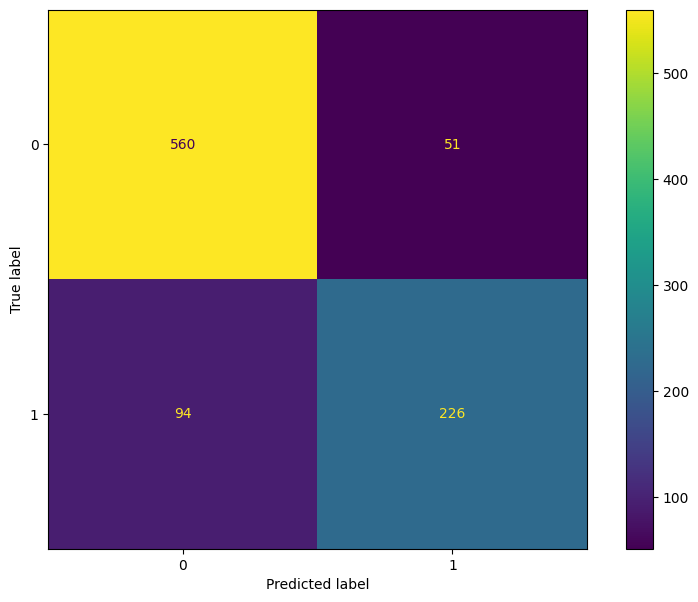

In [180]:
#Model Evaluation Confussion Matrix Test-Set XGBoost Parameter Tuning
cm_test_xgb_opt = confusion_matrix(y_test, y_pred_test_opt)
ConfusionMatrixDisplay(cm_test_xgb_opt).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model XGBoost Parameter Tuning cenderung memprediksi ke kelas *no leave***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class leave* sejumlah 94 kesalahan, kesalahan tersebut di-prediksi sebagai *class no leave*. Sedangkan prediksi *class no leave* terdapat 51 kesalahan. Kesalahan ini diprediksi sebagai kelas *leave*


Kemudian akan saya coba melihat karakteristik dari data FN dan FP dengan pembuatan *dataframe*

In [181]:
# Pembuatan DF Act vs Pred XGBoost Parameter Tuning
act_pred_xgb_opt = pd.DataFrame({
            'actual' : y_test,
            'prediction' : y_pred_test_opt
})
false_xgb_opt = pd.concat([X_test, act_pred_xgb_opt],axis=1)

Kemudian saya akan bandingkan statistik dasar dari True Positif vs False Positif

In [182]:
#Karakteristik True Positif
false_xgb_opt[(false_xgb_opt['actual']==1) &(false_xgb_opt['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,226,226.000000,226,226.000000,226.000000,226,226,226.000000,226.0,226.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Pune,NaN,NaN,Female,No,NaN,NaN,NaN
freq,172,NaN,121,NaN,NaN,143,190,NaN,NaN,NaN
mean,NaN,2015.823009,NaN,2.464602,29.075221,NaN,NaN,2.960177,1.0,1.0
std,NaN,1.917082,NaN,0.574328,4.692178,NaN,NaN,1.446285,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,24.000000,NaN,NaN,0.000000,1.0,1.0
25%,NaN,2015.000000,NaN,2.000000,26.000000,NaN,NaN,2.000000,1.0,1.0
50%,NaN,2016.000000,NaN,3.000000,27.000000,NaN,NaN,3.000000,1.0,1.0
75%,NaN,2018.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,1.0


In [183]:
#Karakteristik False Positif
false_xgb_opt[(false_xgb_opt['actual']==0) &(false_xgb_opt['prediction']==1)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,51,51.000000,51,51.000000,51.000000,51,51,51.000000,51.0,51.0
unique,2,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Masters,NaN,New Delhi,NaN,NaN,Female,No,NaN,NaN,NaN
freq,34,NaN,26,NaN,NaN,27,50,NaN,NaN,NaN
mean,NaN,2015.470588,NaN,2.392157,27.823529,NaN,NaN,2.627451,0.0,1.0
std,NaN,1.901083,NaN,0.695081,5.034703,NaN,NaN,1.427736,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,1.0
25%,NaN,2014.000000,NaN,2.000000,25.000000,NaN,NaN,2.000000,0.0,1.0
50%,NaN,2017.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,1.0
75%,NaN,2017.000000,NaN,3.000000,28.000000,NaN,NaN,4.000000,0.0,1.0


Dari informasi diatas dapat disimpulkan **bahwa model *XGBoost Parameter Tuning* akan False Positif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 27-28 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2
- Karyawan yang bergabung tahun 2015
- Karyawan Wanita yang bekerja di New Delhi dan memiliki tingkat pendidikan Masters
- Karyawan yang tidak terlibat *project* > 1 bulan



Kemudian saya akan bandingkan statistik dasar dari True Negatif vs False Negatif

In [184]:
#Karakteristik True Negatif
false_xgb_opt[(false_xgb_opt['actual']==0) &(false_xgb_opt['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,560,560.000000,560,560.000000,560.000000,560,560,560.000000,560.0,560.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,480,NaN,305,NaN,NaN,381,503,NaN,NaN,NaN
mean,NaN,2014.851786,NaN,2.789286,29.453571,NaN,NaN,2.958929,0.0,0.0
std,NaN,1.729828,NaN,0.502473,4.554342,NaN,NaN,1.523845,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.0,0.0
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.0,0.0
75%,NaN,2017.000000,NaN,3.000000,33.000000,NaN,NaN,4.000000,0.0,0.0


In [185]:
#Karakteristik False Negatif
false_xgb_opt[(false_xgb_opt['actual']==1) &(false_xgb_opt['prediction']==0)].describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,actual,prediction
count,94,94.000000,94,94.000000,94.000000,94,94,94.000000,94.0,94.0
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN
freq,77,NaN,65,NaN,NaN,61,87,NaN,NaN,NaN
mean,NaN,2014.446809,NaN,2.819149,29.265957,NaN,NaN,2.659574,1.0,0.0
std,NaN,1.738972,NaN,0.485550,4.584161,NaN,NaN,1.470522,0.0,0.0
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,1.0,0.0
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,1.000000,1.0,0.0
50%,NaN,2014.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,1.0,0.0
75%,NaN,2016.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.0,0.0


Dari informasi diatas dapat disimpulkan **bahwa model *XGBoost Parameter Tuning* akan False Negatif, jika karyawan memiliki karakteristik sebagai berikut** :

- Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
- Karyawan yang memiliki umur rata-rata 29 tahun
- Karyawan yang memiliki *payment tier* rata-rata 2-3
- Karyawan yang bergabung tahun 2014
- Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
- Karyawan yang tidak terlibat *project* > 1 bulan



### Evaluasi Berdasarkan Metrics

Selanjutnya adalah evaluasi berdasarkan *metrics*. Saya akan coba melihat *classification report train-set* kemudian F1-Score nya akan saya validasi menggunakan *K-Fold*. Setelah di-validasi kemudian akan saya bandingkan dengan *classification report test-set* dan *ROC-AUC*

In [186]:
# Model Evaluation - Train Set XGBoost Parameter Tuning
print(classification_report(y_train_balanced, y_pred_train_opt))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2442
           1       0.95      0.85      0.90      2442

    accuracy                           0.91      4884
   macro avg       0.91      0.91      0.91      4884
weighted avg       0.91      0.91      0.91      4884



F1-Score **Model XGBoost Parameter Tuning** untuk kelas *leave* adalah **0.90** tapi akan saya coba validasi apakah nilai tersebut benar atau tidak dengan *cross validation*.

In [187]:
# Model Evaluation - Train Set KFold XGBoost Parameter Tuning
scores_xgb_opt=cross_val_score(pipeline_xgb_opt,X_train_balanced,y_train_balanced,cv=5,scoring="f1")

print('F1-Score - All - Cross Validation  XGBoost Parameter Tuning: ', scores_xgb_opt)
print('F1-Score - Mean - Cross Validation XGBoost Parameter Tuning: ', scores_xgb_opt.mean())
print('F1-Score - Std - Cross Validation XGBoost Parameter Tuning: ', scores_xgb_opt.std())
print('F1-Score - Range of Train-Set XGBoost Parameter Tuning: ', (scores_xgb_opt.mean()-scores_xgb_opt.std()) , '-', (scores_xgb_opt.mean()+scores_xgb_opt.std()))

F1-Score - All - Cross Validation  XGBoost Parameter Tuning:  [0.797219   0.7972028  0.86150491 0.91963377 0.92182741]
F1-Score - Mean - Cross Validation XGBoost Parameter Tuning:  0.8594775786627444
F1-Score - Std - Cross Validation XGBoost Parameter Tuning:  0.05525334039084235
F1-Score - Range of Train-Set XGBoost Parameter Tuning:  0.804224238271902 - 0.9147309190535868


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan 5 Split-5 Fold), **Model XGBoost Parameter Tuning** memiliki **rata-rata** nilai `F1-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.85**. Yang artinya model tersebut dapat mengklasifikasikan dengan baik untuk kelas *leave* pada *train-set*
- `F1-Score` hasil 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.05**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`F1-Score` dari setiap split tidak berbeda jauh**
- `F1-Score` hasil 5 Split-5 Fold memiliki **range** **0.80-0.91** 



In [188]:
# Model Evaluation - Test Set XGBoost Parameter Tuning
print(classification_report(y_test, y_pred_test_opt))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       611
           1       0.82      0.71      0.76       320

    accuracy                           0.84       931
   macro avg       0.84      0.81      0.82       931
weighted avg       0.84      0.84      0.84       931



In [189]:
#Perhitungan ROC-AUC Test XGBoost Parameter Tuning
y_pred_proba_opt = pipeline_xgb_opt.predict_proba(X_test)[:, 1]
auc_xgb_opt = roc_auc_score(y_test, y_pred_proba_opt)
auc_xgb_opt

0.8715118657937806

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* memiliki selisih yang jauh. Untuk *train* di angka 0.85 sedangkan untuk *test* di angka 0.76. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC* (0.87) dapat disimpulkan bahwa **model tidak dipengaruhi signifikan oleh *treshold***
- Model memiliki akurasi **84%** (dapat mengklasifikasikan kelas *leave* dengan baik)
- Presisi :

Presisi Kelas *no leave* : Dari semua yg diprediksi sebagai ***kelas no leave*** hanya 86%(560 *employee*) yg benar, 14%(94 *employee*) salah prediksi. 14%(94 *employee*) ini diprediksi sebagai *kelas no leave* padahal aslinya *leave*

Presisi Kelas *leave* : Dari semua yg diprediksi sebagai ***kelas leave*** hanya 82%(226 *employee*) yg benar, 18%(51 *employee*) salah prediksi. 18%(51 *employee*) ini diprediksi sebagai *kelas leave* padahal aslinya *no leave*

- Recall :

Recall Kelas *no leave* : Dari semua ***kelas no leave*** hanya 92%(560 *employee*) yg diprediksi benar. 8%(51 *employee*) ini harusnya atau aktualnya adalah *kelas no leave* tetapi diprediksi sebagai *kelas leave*

Recall Kelas *leave* : Dari semua ***kelas leave*** hanya 71%(226 *employee*) yg diprediksi benar. 29%(94 *employee*) ini harusnya atau aktualnya adalah *kelas leave* tetapi diprediksi sebagai *kelas no leave*

- Secara bisnis, **Model XGBoost Parameter Tuning** dapat melakukan prediksi yang tepat pada kelas *leave* (lebih baik dari semua model)

## 9.4 - Model XGBoost vs Model XGBoost Parameter Tuning

Saya akan membuat dataframe untuk mempermudah perbandingan. Sebelumnya saya akan *append score* dari Model Parameter Tuning

In [190]:
#Membuat list
column_list = ['Accuracy','F1_Score','Recall', 'Precision','AUC','KFold_F1']
model_list=['Logistic_Regression','SVM','Decision_Tree','KNN','Random_Forest','XGBoost','ADABoost','XGBoost_Parameter_Tuning']

In [191]:
#Append score dari Random forest parameter tuning
eval_accu.append(accuracy_score(y_test, y_pred_test_opt))
eval_recall.append(recall_score(y_test, y_pred_test_opt))
eval_prec.append(precision_score(y_test, y_pred_test_opt))
eval_f1.append(f1_score(y_test, y_pred_test_opt))
eval_auc.append(auc_xgb_opt)
eval_kfold_mean.append(scores_xgb_opt.mean())


Selanjutnya adalah pembuatan dataframe

In [192]:
#Membuat dataframe performansi
df_eval_final = pd.DataFrame([eval_accu, eval_f1, eval_recall,eval_prec ,eval_auc, eval_kfold_mean], index=column_list, columns=model_list).T

Yang terakhir adalah menampilkan *dataframe*

In [193]:
#Menampilkan evaluasi
df_eval_final = df_eval_final.round(decimals=2)
df_eval_final.sort_values(by='KFold_F1', ascending=False)

,Accuracy,F1_Score,Recall,Precision,AUC,KFold_F1
XGBoost_Parameter_Tuning,0.84,0.76,0.71,0.82,0.87,0.86
XGBoost,0.84,0.75,0.71,0.79,0.87,0.85
Random_Forest,0.83,0.75,0.72,0.78,0.86,0.84
Decision_Tree,0.81,0.72,0.71,0.73,0.79,0.82
KNN,0.80,0.70,0.69,0.72,0.83,0.80
SVM,0.74,0.65,0.69,0.61,0.80,0.77
ADABoost,0.78,0.68,0.68,0.69,0.81,0.77
Logistic_Regression,0.64,0.54,0.61,0.48,0.69,0.66


Dari informasi diatas dapat disimpulkan bahwa :
- Dari segi-metrics, model XGBoost Parameter Tuning *outperform* model XGBoost baseline (*all metrics*)
- Dari segi bisnis artinya model XGBoost Parameter Tuning dapat mengklasifikasikan target `LeaveOrNot` lebih baik dari pada semua model

# 10 - Model Saving

Selanjutnya adalah *Model Saving* & *Model Inference*. *Model Inference* dilakukan pada notebook terpisah. Disini saya hanya export file.


In [194]:
# Save the Files

with open('pipeline_xgb_opt', 'wb') as file_1:
  pickle.dump(pipeline_xgb_opt, file_1)

# 11 - Pengambilan Kesimpulan

Dari penelitian diatas dapat disimpulkan bahwa :

- Karyawan merupakan aset yang berharga bagi organisasi atau perusahaan. Sebagai aset, karyawan harus bisa dikelola dengan baik agar tetap bisa memberikan kontribusi kepada organisasi atau perusahaan. Keberhasilan pengelolaan organisasi sangat ditentukan kegiatan pendayagunaan sumber daya manusia. Akan tetapi, karyawan tidak dapat dan tidak boleh disamakan dengan alat atau mesin pabrik, masing-masing dari mereka memiliki pikiran, perasaan, status, keinginan, dan latar belakang yang berbeda antara yang satu dengan yang lain. Jika karyawan sudah merasa nilai-nilai-nya atau keinginannyna tidak sejalan dengan perusahaan, maka karyawan tersebut berpotensi mengundurkan diri (*resign*). Dengan *resign* nya karyawan, maka sebagai HRD, harus segera mencari pengganti dari karyawan tersebut agar fungsi dalam perusahaan tidak kosong. Karena jika terdapat kekosongan fungsi dalam waktu yang panjang, akan dapat mempengaruhi operasional perusahaan. Oleh karena itu **dibutuhkan model prediktif untuk memprediksi apakah karyawan dalam perusahaan memiliki potensi *resign* atau tidak** 





- Sebelum membuat model, pastinya saya perlu explorasi lebih mengenai faktor-faktor apa saja yang berpengaruh ke dalam pengklasifikasian `LeaveOrNot` dari karyawan. Berikut hasil eksplorasi saya :

    1. Umur 
    
    Umur karyawan terpusat pada 25-30 tahun (2.350 karyawan/50.5%). Jika dilihat dari persentase *resign* pada setiap kelas, maka pada *range* umur 20-25 tahun memiliki persentase *resign* tertinggi. Kemudian pada *range* 25-40 tahun cenderung stabil dan persentase turun di angka 28% pada *range* 40-45 tahun. Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut. Hasilnya ***feature* `Age` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    2. Experience

    Pengalaman karyawan pada domain-nya terpusat pada 2 tahun (1.087 karyawan/23.4%). Karyawan yang paling banyak *resign* adalah karyawan dengan *range* pengalaman 2 tahun (399 karyawan). Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `ExperienceInCurrentDomain` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    3. Joining Year

    Karyawan paling banyak bergabung pada tahun 2017 (1.108 karyawan/23.8%). Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* untuk karyawan yang bergabung pada tahun 2018 lebih besar dari tahun lain-nya (99%). Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `JoiningYear` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    4. Education

    *Education* karyawan terbanyak adalah pada level *bachelors* (3.601 karyawan/77.4%). Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada level edukasi *masters* lebih tinggi dari pada level edukasi lainnya (49%).  Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `Education` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    5. City

    Karyawan banyak yang bekerja pada kota Bangalore (2.228 karyawan/47.9%). Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada karyawan yang bekerja di kota Pune lebih tinggi dari pada karyawan yang bekerja di kota lainnya (50%). Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `City` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    6. Gender

    Karyawan yang bekerja paling banyak memiliki *gender* pria (2.778 karyawan/59.7%). Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada *gender* wanita lebih banyak dari pada *gender* pria (47%). Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `Gender` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    7. Ever Benched

    Karyawan yang tidak pernah memegang *project* > 1 bulan lebih banyak dari yang pernah memegang *project* (4.175 karyawan/89.7%). Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada karyawan yang pernah memegang *project* > 1 bulan lebih tinggi dari pada yang tidak pernah memegang *project* > 1 bulan (45%). Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `EverBenched` berpengaruh terhadap klasifikasi `LeaveOrNot`***

    8. Payment Tier

    Karyawan banyak yang memiliki gaji dengan *tier* 3 (3.492 karyawan/75%). Jika dilihat dari persentase *resign* pada setiap kelas, maka persentase *resign* pada kelas gaji *tier* 2 lebih tinggi dari pada *tier* lainnya (60%). Kemudian saya juga melakukan uji hipotesis mengenai ekslporasi tersebut.  Hasilnya ***feature* `PaymentTier` berpengaruh terhadap klasifikasi `LeaveOrNot`***


- Selanjutnya saya melakukan training pada 7 model, dan **dipilihlah Model XGBoost**. Kemudian model tersebut saya lakukan *parameter tuning* untuk meningkatkan performansi.

- Hasil dari evaluasi model tersebut adalah (**evaluasi teknis**) :

    1. Model XGBoost Parameter Tuning cenderung memprediksi ke kelas *no leave*
    2. Nilai `f1-score` untuk kelas ***leave*** pada *train (hasil validasi 5 split-5 fold)* dan *test* memiliki selisih yang jauh. Untuk *train* di angka 0.85 sedangkan untuk *test* di angka 0.76. Yang artinya **model tersebut *overfit***
    3. Berdasarkan nilai *AUC* (0.87) dapat disimpulkan bahwa **model tidak dipengaruhi signifikan oleh *treshold***
    4. Model memiliki akurasi **84%** (dapat mengklasifikasikan kelas *leave* dengan baik)
    5. Secara bisnis, **Model XGBoost Parameter Tuning** dapat melakukan prediksi yang tepat pada kelas *leave* (lebih baik dari semua model)


- Bagaimana karakteristik karyawan yang salah diklasifikasikan?

    Karakteristik karyawan yang False Positif
    
    - Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
    - Karyawan yang memiliki umur rata-rata 27-28 tahun
    - Karyawan yang memiliki *payment tier* rata-rata 2
    - Karyawan yang bergabung tahun 2015
    - Karyawan Wanita yang bekerja di New Delhi dan memiliki tingkat pendidikan Masters
    - Karyawan yang tidak terlibat *project* > 1 bulan

    Karakteristik karyawan yang False Negatif

    - Karyawan yang memiliki pengalaman rata-rata 2-3 tahun
    - Karyawan yang memiliki umur rata-rata 29 tahun
    - Karyawan yang memiliki *payment tier* rata-rata 2-3
    - Karyawan yang bergabung tahun 2014
    - Karyawan Pria yang bekerja di Bangalore dan memiliki tingkat pendidikan Bachelors
    - Karyawan yang tidak terlibat *project* > 1 bulan




    

- Kelebihan dan Kekurangan Model (Secara bisnis):

    **Kelebihan**

    1. Model sudah dapat memprediksi dengan baik status *resign* dari karyawan

    2. Model memiliki akurasi **84%** (akan tetapi cenderung memprediksi ke arah tidak *resign*)
    
    3. Kemungkinan rugi *cost hire*, akibat menyiapkan *recruitment* yang seharusnya tidak dibutuhkan adalah 8% (1-recall kelas tidak *resign*). Angka ini termasuk angka yang kecil. Untuk mengatasi hal ini, bisa divalidasi langsung dengan karyawan terkait melalui wawancara tertutup

    **Kekurangan**

    1. Jika perlu meng-update model dengan data baru maka membutuhkan waktu lebih lama (**Waktu training lama**)
    
    2. Model ini termasuk model yang kompleks, karena susah menjelaskan mengapa model tersebut dapat mengklasifikasikan karaywan ke kelas tertentu (banyak pohon keputusan)

    3. Model cenderung memprediksi ke kelas tidak *resign*

    4. Kemungkinan rugi *functional cost*, akibat tidak mempersiapkan *recruitment* yang seharusnya dibutuhkan adalah 29% (1-recall kelas *resign*).
    


- Kemudian *continuous improvement* yang bisa saya sarankan adalah :

    - Untuk meningkatkan performa dari model yang dapat dilakukan adalah memberikan bobot pada setiap *feature* yang dapat memberikan *impact* lebih besar terhadap peng-klasifikasian. Akan tetapi bobot tersebut adalah **bobot hasil konsultasi ke pakar domain dan *research* di perusahaan**. Sebagai contoh pada *research* yang saya lakukan, *payment* merupakan faktor penting yang menentukan apakah karyawan akan *resign* atau tidak (https://www.pewresearch.org/fact-tank/2022/03/09/majority-of-workers-who-quit-a-job-in-2021-cite-low-pay-no-opportunities-for-advancement-feeling-disrespected/#:~:text=Majorities%20of%20workers%20who%20quit,major%20reasons%20why%20they%20left.). Oleh karena itu, untuk *feature* ini perlu bobot lebih tinggi agar tidak salah klasifikasi. Misal ada karyawan yang memiliki gaji tinggi, akan tetapi tidak pernah mengerjakan proyek. Karena bobot *feature* gaji lebih tinggi, maka karyawan tersebut **tidak akan diklasifikasikan sebagai *resign**.

    - Karena model tersebut *overfit*, artinya pada data *train* memiliki performa bagus akan tetapi pada data *test* memiliki performa jelek. Oleh karena itu perlu adanya seleksi *feature* berdasarkan pakar domain (seleksi *feature* yang memiliki *power* besar untuk mengkasifikasikan karyawan ke kelas tidak *resign* / *resign*). Berdasarkan uji hipotesis, semua *feature* berpengaruh. Akan tetapi, seharusnya bisa diseleksi ke *feature* yang benar-benar berpengaruh terhadap klasifikasi data. Selain itu bisa juga dengan menambah data *dummy* untuk karyawan yang *resign* (bukan data hasil *generate system*) berdasarkan karakteristik karyawan yang *resign*.

    - Jika model sudah memiliki performa baik, selanjutnya bisa mengkombinasikan nya dengan model prediksi *budget recruitment* untuk 2 tahun kedepan. Jadi *output* pada model ini akan digunakan untuk memprediksi *budget* yang dibutuhkan untuk *recruitment* pada tahun berikutnya

    - Model ini juga bisa di-detailkan lagi ke pencapaian KPI setiap karyawan. Jadi klasifikasi *resign* juga dipengaruhi oleh KPI. Karena yang KPI nya rendah, menunjukkan adanya kemungkinan karyawan bekerja tidak optimal. Karyawan yang bekerjanya tidak optimal, merupakan salah satu indikator yang dapat menyebabkan karyawan *resign* (mungkin karena *workload* yang berat, atau sudah tidak ada keinginan untuk bekerja optimal)